In [ ]:
import absl
import aiohttp
import altair as alt
import folium
import geopy
import jupyter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot
import hvplot.pandas
import holoviews as hv
import seaborn as sns
import plotly.express as px
import sklearn
import scipy
import streamlit as st
import torch
from scipy.stats import chi2_contingency
from pandarallel import pandarallel
from src.tools import return_cleaned_col_names
from src.function_transformers import (
 __drop_features_with_many_nan,
fun_tr_drop_features_with_many_nan,
)
from src.function_transformers import (
    fun_tr_transform_to_datetime,
    fun_tr_transform_to_int,
    fun_tr_round_to_two_decimals,   
)
from src.class_transformers import (
    GenderTransformer,
    ApplicationSignedHourTransformer,
    ApplicationSignedWeekdayTransformer,
    AgeTransformer,
    AmountDifferenceTransformer,
    EducationTransformer,
    BidsAnalysisTransformer,
    LanguageCountryMatchTransformer,
    NewCreditCustomerTransformer,
    VerificationTypeTransformer,
    OccupationAreaTransformer,
    RatingTransformer,
    HomeOwnershipTypeTransformer,
    CreditScoreEsMicroLTransformer,
    LoanDurationTransformer,
    ColumnDropperTransformer
)
from datetime import datetime
from sklearn import set_config
set_config(transform_output="pandas")
import joblib
import sys
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.utils import estimator_html_repr
from feature_engine.datetime import DatetimeSubtraction
from sklearn.linear_model import LogisticRegression
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder, CountFrequencyEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, PolynomialFeatures, PowerTransformer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import explained_variance_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from feature_engine.creation import RelativeFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [2]:
file_path = "C:/Users/marco/Desktop/tesi/project/data/Loan_Data_Bondora.csv"
data = pd.read_csv(file_path, delimiter=",",low_memory=False)
data

,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,...,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,LoanCancelled,PreviousEarlyRepaymentsBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11.0,0.0,88.0,False,2022-09-09 15:15:03,2022-09-09,...,NaN,2024-05-27,6.0,23.0,2023-11-30,NaN,NaN,NaN,NaN,NaN
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0.0,0.0,0.0,False,2023-05-19 14:03:54,2023-05-19,...,NaN,2024-05-27,11.0,120.0,2023-07-20,NaN,NaN,91-120,NaN,NaN
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0.0,0.0,0.0,False,2024-02-03 16:41:51,2024-02-03,...,NaN,2024-07-08,2.0,12.0,2024-05-12,NaN,NaN,NaN,NaN,NaN
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970.0,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,...,2020-01-27,NaN,NaN,NaN,NaN,0.0,82.76,180+,NaN,0.0
4,C7EA512A-465D-4043-A9F2-001B14C3C14E,4043783,2023-09-26 12:14:12,2023-09-26 15:14:12,0.0,0.0,0.0,False,2023-09-26 15:13:07,2023-09-26,...,NaN,2024-06-04,9.0,108.0,NaN,NaN,NaN,16-30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400165,32db2947-840f-4300-9d1b-b1d400dccc23,4861944,2024-08-22T10:31:09.467,2024-08-22T13:31:09.437,0.0,0.0,0.0,False,2024-08-22T13:23:55.993,2024-08-22T00:00:00,...,NaN,2024-09-16T00:00:00,1.0,60.0,NaN,NaN,NaN,NaN,False,NaN
400166,38415179-430f-44a2-a1c2-b1d400dce5a7,4861947,2024-08-22T10:31:22.03,2024-08-22T13:31:22.007,0.0,0.0,0.0,True,2024-08-22T13:24:18.07,2024-08-22T00:00:00,...,NaN,2024-09-25T00:00:00,1.0,60.0,NaN,NaN,NaN,NaN,False,NaN
400167,7c9aaeba-8168-4bec-a186-b1d400de2b3c,4861973,2024-08-22T10:31:48.49,2024-08-22T13:31:48.427,0.0,3.0,0.0,True,2024-08-22T13:28:57.467,2024-08-22T00:00:00,...,NaN,2024-09-11T00:00:00,1.0,84.0,NaN,NaN,NaN,NaN,False,NaN
400168,32985dab-c577-43fd-a18d-b1d400de6091,4861981,2024-08-22T10:33:57.62,2024-08-22T13:33:57.587,0.0,0.0,0.0,False,2024-08-22T13:29:41.017,2024-08-22T00:00:00,...,NaN,2024-09-25T00:00:00,1.0,12.0,NaN,NaN,NaN,NaN,False,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400170 entries, 0 to 400169
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   LoanId                                  400170 non-null  object 
 1   LoanNumber                              400170 non-null  int64  
 2   ListedOnUTC                             400170 non-null  object 
 3   BiddingStartedOn                        400170 non-null  object 
 4   BidsPortfolioManager                    400170 non-null  float64
 5   BidsApi                                 400170 non-null  float64
 6   BidsManual                              400170 non-null  float64
 7   NewCreditCustomer                       400170 non-null  bool   
 8   LoanApplicationStartedDate              400170 non-null  object 
 9   LoanDate                                400170 non-null  object 
 10  ContractEndDate                         1030

### Description of variables

- **LoanId**: A unique ID given to a loan.
- **ListedOnUTC**: Date when the loan application appeared on the Primary Market.
- **BiddingStartedOn**: Date when the auction bidding started.
- **BidsPortfolioManager**: The amount of investment offers made by Portfolio Managers.
- **BidsApi**: The amount of investment offers made via API.
- **BidsManual**: The amount of investment offers made manually.
- **NewCreditCustomer**: Indicates if the customer had prior credit history in Bondora:
  - `false`: Customer had at least 3 months of credit history in Bondora.
  - `true`: No prior credit history in Bondora.
- **LoanApplicationStartedDate**: Date when the loan application was started.
- **LoanDate**: Date when the loan was issued.
- **ContractEndDate**: Date when the loan contract ended.
- **FirstPaymentDate**: First payment date according to the initial loan schedule.
- **MaturityDate_Original**: Loan maturity date according to the original loan schedule.
- **MaturityDate_Last**: Loan maturity date as of the report generation date.
- **ApplicationSignedHour**: Hour of signing the loan application.
- **ApplicationSignedWeekday**: Weekday of signing the loan application.
- **VerificationType**: Method used for loan application data verification:
  - `1`: Not Verified.
  - `2`: Verified by Phone.
  - `3`: Verified by Other Document.
  - `4`: Verified by Bank Statement.
- **LanguageCode**: Customer's two-letter language code:
  - `Et=1`, `En=2`, `Ru=3`, `Fi=4`, `De=5`, `Es=6`, `Pl=7`, `Lv=8`, `Sk=9`, `Sl=10`, `Bg=11`, `Hr=12`, `Cs=13`, `Da=14`, `Fr=15`, `El=16`, `Hu=17`, `Lt=18`, `Nl=19`, `Pt=20`, `Ro=21`, `Sv=22`, `It=23`, `No=24`, `Zu=25`, `Ja=26`.
- **Age**: Age of the borrower (in years).
- **Gender**: Borrower's gender:
  - `0`: Male.
  - `1`: Female.
  - `2`: Unknown.
- **Country**: Residency of the borrower.
- **County**: County of the borrower.
- **City**: City of the borrower.
- **AppliedAmount**: Amount applied for by the borrower.
- **Amount**: Amount the borrower received.
- **Interest**: Interest rate.
- **LoanDuration**: The loan term (in months).
- **MonthlyPayment**: Estimated amount the borrower has to pay every month.
- **Education**: Education level of the borrower:
  - `1`: Primary education.
  - `2`: Basic education.
  - `3`: Vocational education.
  - `4`: Secondary education.
  - `5`: Higher education.
- **EmploymentDurationCurrentEmployer**: Employment time with the current employer.
- **OccupationArea**: Borrower's occupation area:
  - `1`: Other.
  - `2`: Mining.
  - `3`: Processing.
  - `4`: Energy.
  - `5`: Utilities.
  - `6`: Construction.
  - `7`: Retail.
  - `8`: Transport.
  - `9`: Hospitality.
  - `10`: Telecom.
  - `11`: Finance.
  - `12`: Real Estate.
  - `13`: Research.
  - `14`: Administrative.
  - `15`: Civil Service.
  - `16`: Education.
  - `17`: Healthcare.
  - `18`: Art.
  - `19`: Agriculture.
- **HomeOwnershipType**: Borrower's home ownership type:
  - `0`: Homeless.
  - `1`: Owner.
  - `2`: Living with Parents.
  - `3`: Tenant Furnished.
  - `4`: Tenant Unfurnished.
  - `5`: Council Tenant.
  - `6`: Joint Tenant.
  - `7`: Joint Owner.
  - `8`: Owner Mortgage.
  - `9`: Owner Encumbrance.
  - `10`: Other.
- **IncomeFromPrincipalEmployer**: Salary from the principal employer.
- **IncomeFromPension**: Pension income.
- **IncomeFromFamilyAllowance**: Family allowance income.
- **IncomeFromSocialWelfare**: Social welfare income.
- **IncomeFromLeavePay**: Leave pay income.
- **IncomeFromChildSupport**: Child support income.
- **IncomeOther**: Other income sources.
- **IncomeTotal**: Total income.
- **ExistingLiabilities**: Borrower's number of existing liabilities.
- **RefinanceLiabilities**: Total amount of liabilities after refinancing.
- **LiabilitiesTotal**: Total monthly liabilities.
- **DebtToIncome**: Debt-to-income ratio.
- **FreeCash**: Discretionary income after monthly liabilities.
- **MonthlyPaymentDay**: The day of the month the loan payments are scheduled for (adjusted for weekends and bank holidays).
- **ActiveScheduleFirstPaymentReached**: Whether the first payment date has been reached according to the active schedule.
- **PlannedPrincipalTillDate**: Amount of principal the investment should have received according to the active schedule.
- **PlannedInterestTillDate**: Amount of interest the investment should have received according to the active schedule.
- **LastPaymentOn**: Date of the last payment received from the borrower.
- **CurrentDebtDaysPrimary**: How long the loan has been in Principal Debt.
- **DebtOccuredOn**: Date when Principal Debt occurred.
- **CurrentDebtDaysSecondary**: How long the loan has been in Interest Debt.
- **DebtOccuredOnForSecondary**: Date when Interest Debt occurred.
- **ExpectedLoss**: Expected loss calculated by the current Rating model.
- **LossGivenDefault**: Percentage of outstanding exposure at the time of default that an investor is likely to lose.
- **ExpectedReturn**: Expected return calculated by the current Rating model.
- **ProbabilityOfDefault**: Probability of default within a one-year horizon.
- **DefaultDate**: Date when the loan went into defaulted state and the collection process started.
- **PrincipalOverdueBySchedule**: Principal that is overdue according to the current schedule.
- **PlannedPrincipalPostDefault**: Amount of principal planned to be received after the default occurred.
- **PlannedInterestPostDefault**: Amount of interest planned to be received after the default occurred.
- **EAD1**: Exposure at default (outstanding principal at default).
- **EAD2**: Exposure at default (loan amount less all payments prior to default).
- **PrincipalRecovery**: Principal recovered due to the collection process.
- **InterestRecovery**: Interest recovered due to the collection process.
- **RecoveryStage**: Current stage according to the recovery model:
  - `1`: Collection.
  - `2`: Recovery.
  - `3`: Write Off.
- **StageActiveSince**: How long the current recovery stage has been active.
- **ModelVersion**: Version of the Rating model used for issuing the Bondora.
- **Rating**: Bondora Rating issued by the Rating model.
- **EL_V0**: Expected loss calculated by version 0 of the Rating model.
- **Rating_V0**: Bondora Rating issued by version 0 of the Rating model.
- **EL_V1**: Expected loss calculated by version 1 of the Rating model.
- **Rating_V1**: Bondora Rating issued by version 1 of the Rating model.
- **EL_V2**: Expected loss calculated by version 2 of the Rating model.
- **Rating_V2**: Bondora Rating issued by version 2 of the Rating model.
- **LoanCancelled**: Indicates if the loan was cancelled.
- **Status**: Current status of the loan application.
- **Restructured**: Indicates if the original maturity date of the loan has been increased by more than 60 days.
- **ActiveLateCategory**: Categorization of the loan based on Principal Debt days.
- **WorseLateCategory**: Longest period of days when the loan was in Principal Debt.
- **CreditScoreEsMicroL**: Risk classification score for subprime borrowers (10-grade scale: M1 to M10).
- **CreditScoreEsEquifaxRisk**: Generic score for loan applicants without active past due operations in ASNEF (6-grade scale: AAA to D).
- **CreditScoreFiAsiakasTietoRiskGrade**: Credit scoring model for Finnish Asiakastieto (5-grade scale: RL1 to RL5).
- **CreditScoreEeMini**: Credit scoring for Estonian loans:
  - `1000`: No previous payment problems.
  - `900`: Payment problems finished 24-36 months ago.
  - `800`: Payment problems finished 12-24 months ago.
  - `700`: Payment problems finished 6-12 months ago.
  - `600`: Payment problems finished <6 months ago.
  - `500`: Active payment problems.
- **PrincipalPaymentsMade**: Principal amount received by the note owner.
- **InterestAndPenaltyPaymentsMade**: Interest and penalties amount received by the note owner.
- **PrincipalWriteOffs**: Principal amount written off on the investment.
- **InterestAndPenaltyWriteOffs**: Interest amount written off on the investment.
- **PrincipalDebtServicingCost**: Service cost related to the recovery of the debt based on the principal.
- **InterestAndPenaltyDebtServicingCost**: Service cost related to the recovery of the debt based on interest and penalties.
- **PrincipalBalance**: Principal amount still to be paid by the borrower.
- **InterestAndPenaltyBalance**: Unpaid interest and penalties.
- **NoOfPreviousLoansBeforeLoan**: Number of previous loans.
- **AmountOfPreviousLoansBeforeLoan**: Value of previous loans.
- **PreviousRepaymentsBeforeLoan**: Amount repaid by the borrower before the loan.
- **PreviousEarlyRepaymentsBeforeLoan**: Early repaid amount before this loan.
- **PreviousEarlyRepaymentsCountBeforeLoan**: Number of early repaid loans before this loan.
- **GracePeriodStart**: Start date of the grace period.
- **GracePeriodEnd**: End date of the grace period.
- **NextPaymentDate**: Next scheduled payment date for the borrower.
- **NextPaymentNr**: Number of the next scheduled payment.
- **NrOfScheduledPayments**: Total number of scheduled payments.
- **ReScheduledOn**: Date when a new schedule was assigned to the borrower.

In [3]:
#drop unseful columns
data.drop(
    [
        "LoanNumber",
        "ListedOnUTC",
        "BiddingStartedOn",
        "LoanApplicationStartedDate",    
        "ModelVersion", 
        "IncomeFromPrincipalEmployer",
        "IncomeFromPension",
        "IncomeFromFamilyAllowance",
        "IncomeFromSocialWelfare",
        "IncomeFromLeavePay",
        "IncomeFromChildSupport",
        "IncomeOther",
        "PrincipalPaymentsMade",
        "PlannedInterestTillDate",
    ],
    axis=1,
    inplace=True
)

In [4]:
missing_values_count = data.isnull().sum().sum()
print("Total missing values:", missing_values_count)

Total missing values: 9199332


In [4]:
missing_values_count = data.isnull().sum()
missing_values_percent = round(data.isnull().sum()/data.isnull().count(),3)
cols = data.columns
cols = list(cols)
for i in range(0,len(missing_values_count)):
    print(cols[i] + " -> " + str(missing_values_count[i]) + " -> "+ str(missing_values_percent[i]))

LoanId -> 0 -> 0.0
BidsPortfolioManager -> 0 -> 0.0
BidsApi -> 0 -> 0.0
BidsManual -> 0 -> 0.0
NewCreditCustomer -> 0 -> 0.0
LoanDate -> 0 -> 0.0
ContractEndDate -> 297158 -> 0.743
FirstPaymentDate -> 0 -> 0.0
MaturityDate_Original -> 0 -> 0.0
MaturityDate_Last -> 0 -> 0.0
ApplicationSignedHour -> 0 -> 0.0
ApplicationSignedWeekday -> 0 -> 0.0
VerificationType -> 50 -> 0.0
LanguageCode -> 0 -> 0.0
Age -> 0 -> 0.0
Gender -> 45 -> 0.0
Country -> 0 -> 0.0
AppliedAmount -> 0 -> 0.0
Amount -> 0 -> 0.0
Interest -> 0 -> 0.0
LoanDuration -> 0 -> 0.0
MonthlyPayment -> 6690 -> 0.017
Education -> 50 -> 0.0
EmploymentDurationCurrentEmployer -> 13894 -> 0.035
OccupationArea -> 91 -> 0.0
HomeOwnershipType -> 1657 -> 0.004
IncomeTotal -> 0 -> 0.0
ExistingLiabilities -> 0 -> 0.0
LiabilitiesTotal -> 0 -> 0.0
RefinanceLiabilities -> 0 -> 0.0
DebtToIncome -> 50 -> 0.0
FreeCash -> 50 -> 0.0
MonthlyPaymentDay -> 0 -> 0.0
ActiveScheduleFirstPaymentReached -> 0 -> 0.0
PlannedPrincipalTillDate -> 345706 -> 0.8

C:\Users\marco\AppData\Local\Temp\ipykernel_14656\1989571471.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(cols[i] + " -> " + str(missing_values_count[i]) + " -> "+ str(missing_values_percent[i]))


In [5]:
missing_stats = {"MissingValuesCount": missing_values_count, "Percent": missing_values_percent}
missing_df = pd.DataFrame(missing_stats)
missing_df

,MissingValuesCount,Percent
LoanId,0,0.000
BidsPortfolioManager,0,0.000
BidsApi,0,0.000
BidsManual,0,0.000
NewCreditCustomer,0,0.000
...,...,...
PrincipalDebtServicingCost,285617,0.714
InterestAndPenaltyDebtServicingCost,285617,0.714
ActiveLateLastPaymentCategory,248309,0.621
LoanCancelled,389970,0.975


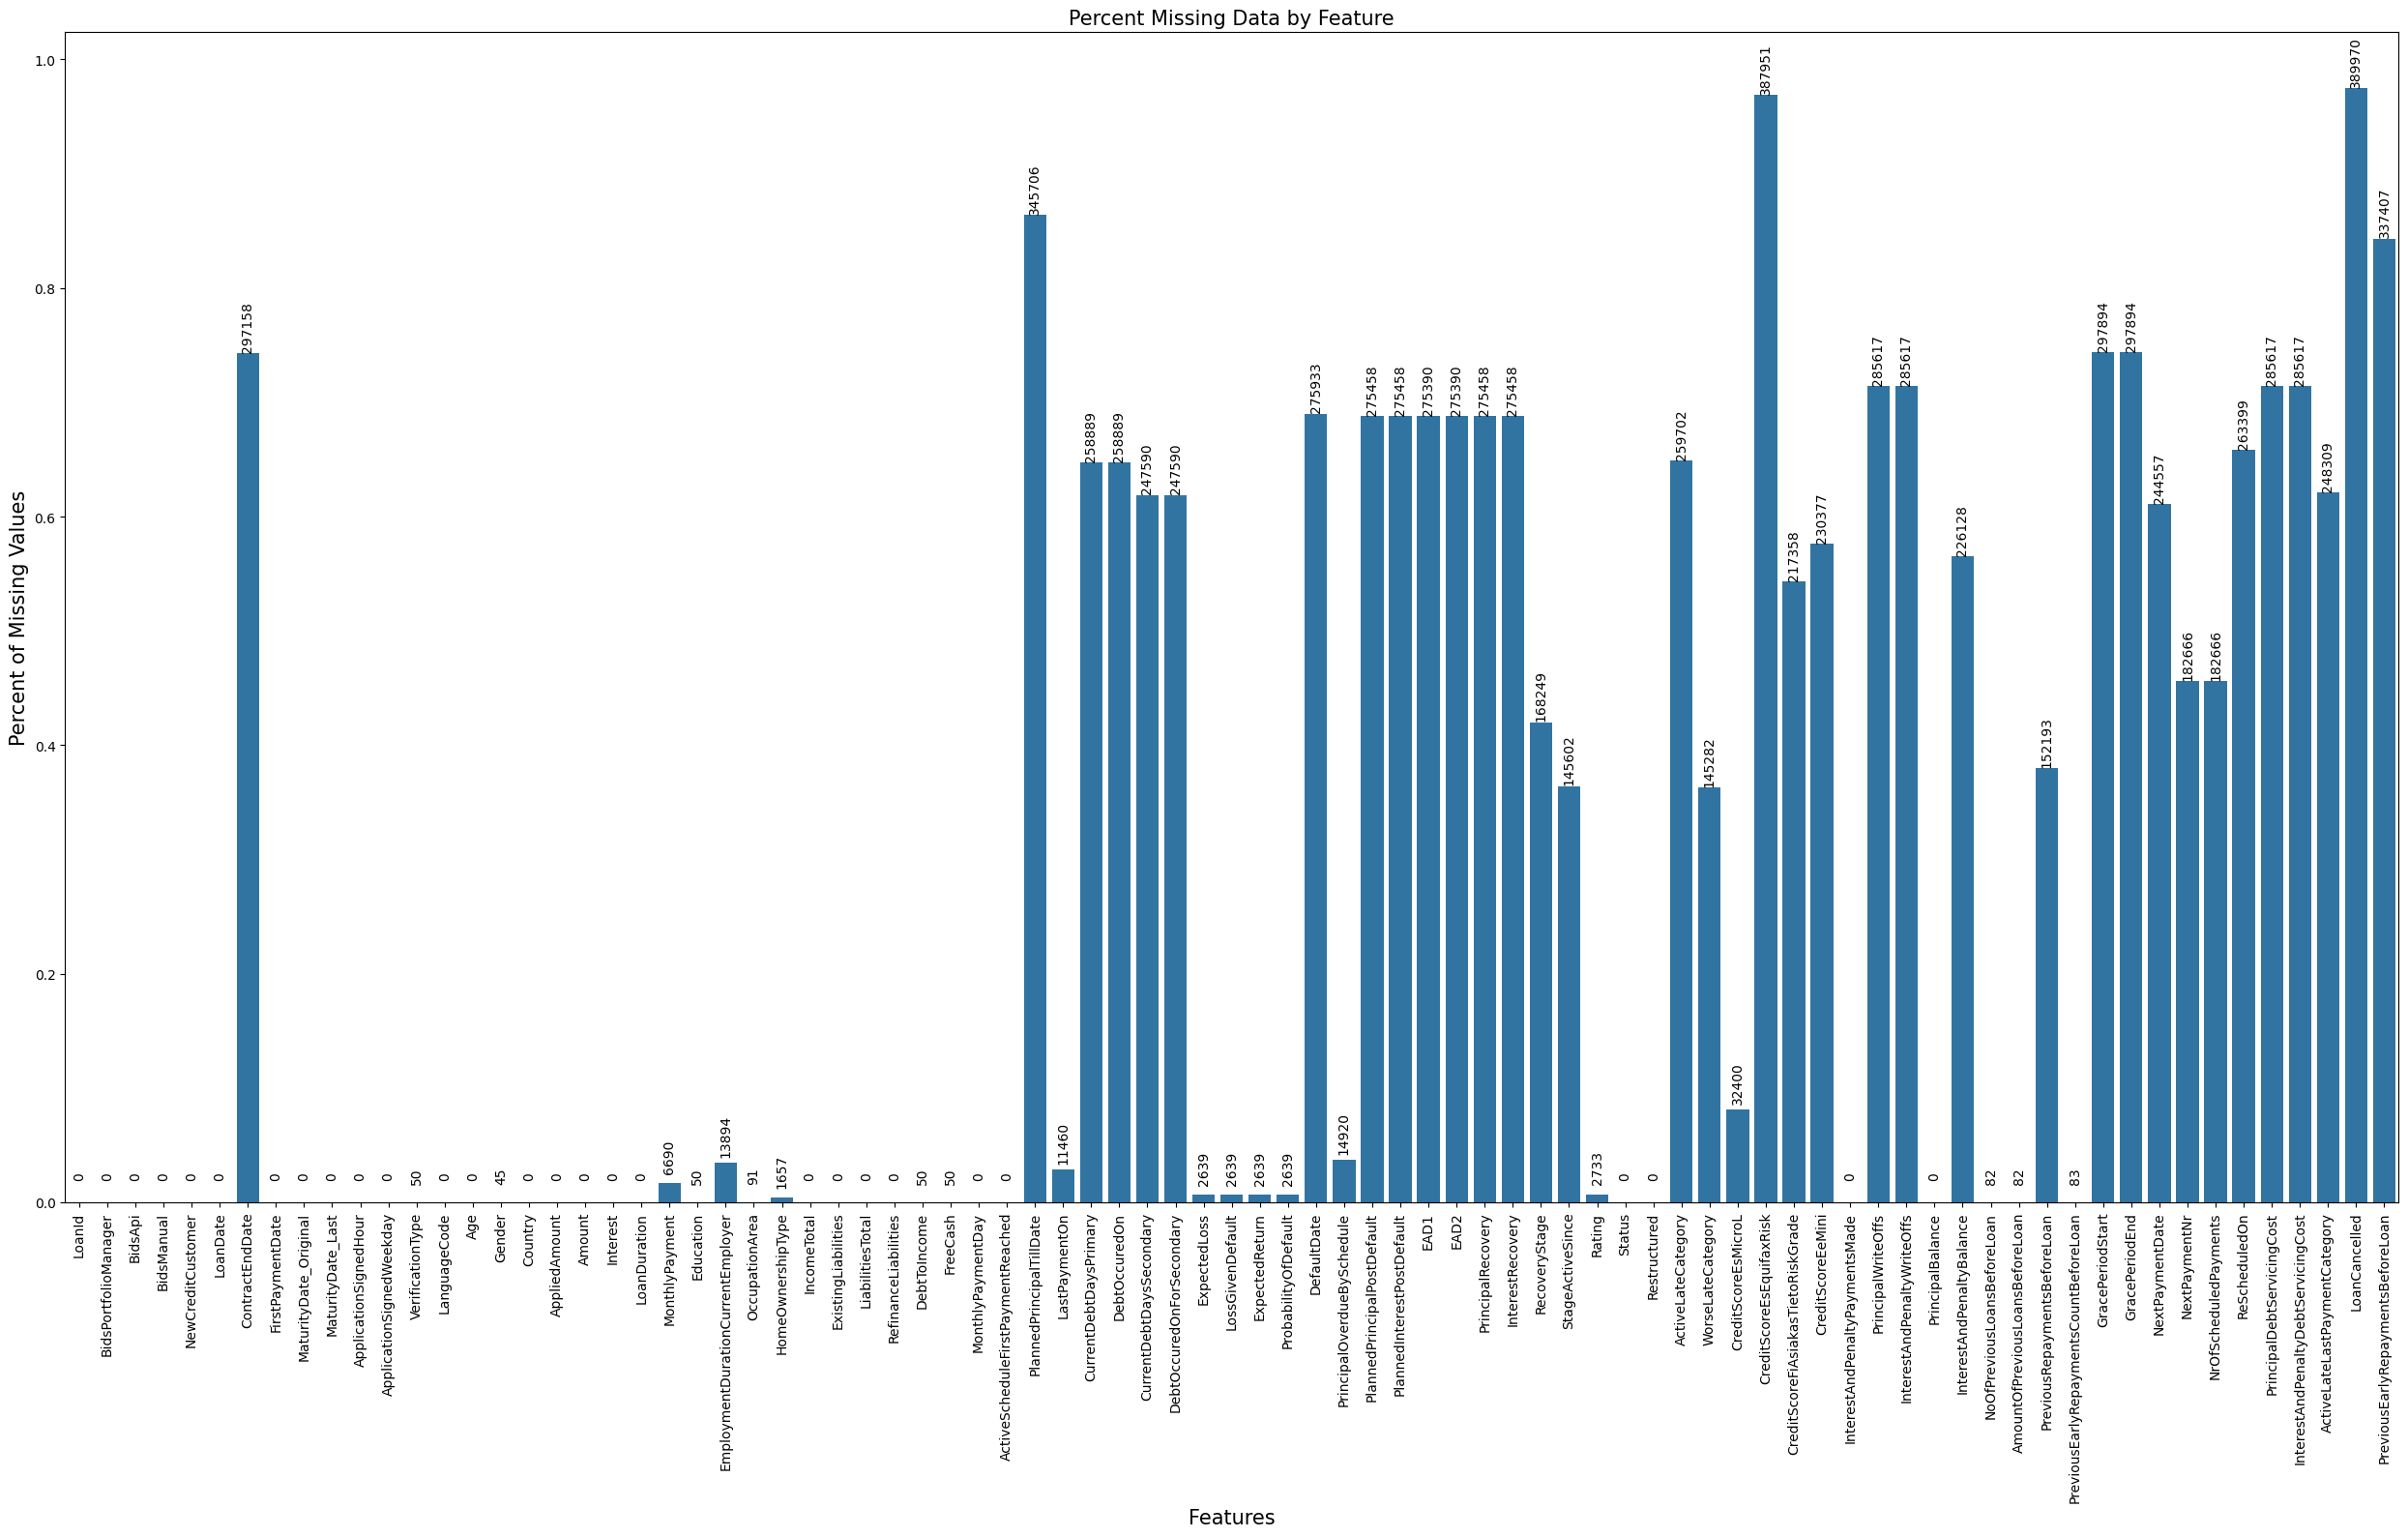

In [67]:
# Graphical Visualization of percent of Missing values

f, ax = plt.subplots(figsize=(25, 16))
plt.xticks(rotation=90)  

gplot = sns.barplot(x=missing_df.index, y=missing_df['Percent'], ax=ax)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

# Annotate the bars with the count of missing values
for i, p in enumerate(gplot.patches):
    value = missing_df["MissingValuesCount"].iloc[i]  
    gplot.annotate(format(value), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 20), 
                   textcoords='offset points', rotation=90)

plt.savefig("TrendofMissingValues.jpg", dpi=300)
plt.tight_layout()
plt.show()

In [5]:
data.set_index("LoanId", inplace=True)
data_without_target=data.drop(columns=["DefaultDate"])
fun_tr_drop_features_with_many_nan = FunctionTransformer(__drop_features_with_many_nan)
cleaned_dataset= fun_tr_drop_features_with_many_nan.transform(data_without_target)
print(f"Number of features in the original dataset: {data_without_target.shape[1]}")
print(f"Number of features in the dataset after dropping: {cleaned_dataset.shape[1]}")
print(f"Removed columns: {set(data_without_target.columns) - set(cleaned_dataset.columns)}")



Dropping features:
['ContractEndDate', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary', 'DebtOccuredOnForSecondary', 'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage', 'StageActiveSince', 'ActiveLateCategory', 'WorseLateCategory', 'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'InterestAndPenaltyBalance', 'PreviousRepaymentsBeforeLoan', 'GracePeriodStart', 'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr', 'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory', 'LoanCancelled', 'PreviousEarlyRepaymentsBeforeLoan']
Number of features in the original dataset: 81
Number of features in the dataset after dropping: 47
Removed columns: {'ContractEndDate', 'CreditScoreEsEquifaxRis

In [7]:
missing_values_count = cleaned_dataset.isnull().sum().sum()
print("Total missing values:", missing_values_count)

Total missing values: 94893


In [6]:
cleaned_dataset["DefaultDate"] = data.loc[cleaned_dataset.index, "DefaultDate"]
print(cleaned_dataset.shape)

(400170, 48)


In [11]:
# Convert the DefaultDate feature into the 0/1 target variable
cleaned_dataset['DefaultDate'].fillna('UNKNOWN', inplace=True)
def reclass_somecol(target):
    if target == 'UNKNOWN': return 0
    else: return 1
cleaned_dataset['target'] = cleaned_dataset['DefaultDate'].apply(reclass_somecol)
cleaned_dataset.drop(columns=['DefaultDate'], inplace=True)

# Take a peek at the dataframe after cleaning
print(cleaned_dataset.head())

C:\Users\marco\AppData\Local\Temp\ipykernel_9616\3605769926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_dataset['DefaultDate'].fillna('UNKNOWN', inplace=True)


                                      BidsPortfolioManager  BidsApi  \
LoanId                                                                
D8EBF360-104C-420F-BEC9-000924E6EFC7                  11.0      0.0   
C1A98DDA-5E20-429C-BBFF-0009A05354E0                   0.0      0.0   
9B0B252E-45B9-4172-8E2D-0014A8F18117                   0.0      0.0   
66AE108B-532B-4BB3-BAB7-0019A46412C1                 970.0   1150.0   
C7EA512A-465D-4043-A9F2-001B14C3C14E                   0.0      0.0   

                                      BidsManual  NewCreditCustomer  \
LoanId                                                                
D8EBF360-104C-420F-BEC9-000924E6EFC7        88.0              False   
C1A98DDA-5E20-429C-BBFF-0009A05354E0         0.0              False   
9B0B252E-45B9-4172-8E2D-0014A8F18117         0.0              False   
66AE108B-532B-4BB3-BAB7-0019A46412C1         5.0              False   
C7EA512A-465D-4043-A9F2-001B14C3C14E         0.0              False   

    

In [12]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400170 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 48 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    400170 non-null  float64
 1   BidsApi                                 400170 non-null  float64
 2   BidsManual                              400170 non-null  float64
 3   NewCreditCustomer                       400170 non-null  bool   
 4   LoanDate                                400170 non-null  object 
 5   FirstPaymentDate                        400170 non-null  object 
 6   MaturityDate_Original                   400170 non-null  object 
 7   MaturityDate_Last                       400170 non-null  object 
 8   ApplicationSignedHour                   400170 non-null  int64  
 9   ApplicationSignedWeekday                400170 non-nul

In [ ]:
print("Executing preprocessing on features...")
feature_preprocessor=ColumnTransformer(
    remainder="passthrough",
    n_jobs=-1,
    force_int_remainder_cols=False,
    transformers=[
        ('verification_type', SimpleImputer(strategy='constant', fill_value=0), ['VerificationType']),
        ('gender', SimpleImputer(strategy='constant', fill_value=2), ['Gender']),
        ('monthly_payment', SimpleImputer(strategy='median'), ['MonthlyPayment']),
        ('education', SimpleImputer(strategy='constant', fill_value=0), ['Education']),
        ('employment_duration', SimpleImputer(strategy='constant', fill_value='Other'), ['EmploymentDurationCurrentEmployer']),
        ('occupation_area', SimpleImputer(strategy='constant', fill_value=-1), ['OccupationArea']),
        ('home_ownership', SimpleImputer(strategy='constant', fill_value=-1), ['HomeOwnershipType']),
        ('debt_to_income', SimpleImputer(strategy='median'), ['DebtToIncome']),
        ('free_cash', SimpleImputer(strategy='median'), ['FreeCash']),
        ('expected_loss', SimpleImputer(strategy='median'), ['ExpectedLoss']),
        ('loss_given_default', SimpleImputer(strategy='constant', fill_value=0.9), ['LossGivenDefault']),
        ('expected_return', SimpleImputer(strategy='median'), ['ExpectedReturn']),
        ('probability_of_default', SimpleImputer(strategy='median'), ['ProbabilityOfDefault']),
        ('principal_overdue', SimpleImputer(strategy='median'), ['PrincipalOverdueBySchedule']),
        ('rating', SimpleImputer(strategy='most_frequent'), ['Rating']),
        ('credit_score', SimpleImputer(strategy='constant', fill_value='M'), ['CreditScoreEsMicroL']),
        ('previous_loans', SimpleImputer(strategy='median'), ['NoOfPreviousLoansBeforeLoan']),
        ('previous_loans_amount', SimpleImputer(strategy='median'), ['AmountOfPreviousLoansBeforeLoan']),
        ('early_repayments', SimpleImputer(strategy='median'), ['PreviousEarlyRepaymentsCountBeforeLoan']),
        ('last_payment_on', SimpleImputer(strategy='constant',fill_value="2009-02-01"), ['LastPaymentOn']),
    ],
    verbose=True,
)

Executing preprocessing on features...


In [15]:
cleaned_dataset=feature_preprocessor.fit_transform(cleaned_dataset)

In [16]:
print("Preprocessing on features completed!")
cleaned_dataset = pd.DataFrame(cleaned_dataset)
cleaned_dataset.columns = return_cleaned_col_names(cleaned_dataset.columns)
print("Cleaned feature names retrieved")

Preprocessing on features completed!
Cleaned feature names retrieved


In [17]:
datatypes = cleaned_dataset.dtypes.to_frame('dtypes').reset_index()

In [18]:
print(datatypes)

                                     index   dtypes
0                         VerificationType  float64
1                                   Gender  float64
2                           MonthlyPayment  float64
3                                Education  float64
4        EmploymentDurationCurrentEmployer   object
5                           OccupationArea  float64
6                        HomeOwnershipType  float64
7                             DebtToIncome  float64
8                                 FreeCash  float64
9                             ExpectedLoss  float64
10                        LossGivenDefault  float64
11                          ExpectedReturn  float64
12                    ProbabilityOfDefault  float64
13              PrincipalOverdueBySchedule  float64
14                                  Rating   object
15                     CreditScoreEsMicroL   object
16             NoOfPreviousLoansBeforeLoan  float64
17         AmountOfPreviousLoansBeforeLoan  float64
18  Previous

In [10]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400170 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 56 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   VerificationType                        400170 non-null  float64
 1   Gender                                  400170 non-null  float64
 2   MonthlyPayment                          400170 non-null  float64
 3   Education                               400170 non-null  float64
 4   EmploymentDurationCurrentEmployer       400170 non-null  object 
 5   OccupationArea                          400170 non-null  float64
 6   HomeOwnershipType                       400170 non-null  float64
 7   DebtToIncome                            400170 non-null  float64
 8   FreeCash                                400170 non-null  float64
 9   PlannedInterestTillDate                 400170 non-nul

In [19]:
time_feature=["LoanDate", "FirstPaymentDate", "MaturityDate_Original", "MaturityDate_Last", "LastPaymentOn"]
for col in time_feature:
    cleaned_dataset[col] = cleaned_dataset[col].str.replace("T00:00:00", "", regex=False)
    
int_feature=["VerificationType", "Gender", "Education", "OccupationArea", "HomeOwnershipType", "PrincipalOverdueBySchedule", "NoOfPreviousLoansBeforeLoan", "AmountOfPreviousLoansBeforeLoan", "PreviousEarlyRepaymentsCountBeforeLoan", "BidsPortfolioManager", "BidsApi", "BidsManual", "AppliedAmount", "Amount", "IncomeTotal","NewCreditCustomer", "ActiveScheduleFirstPaymentReached", "Restructured"]
round_two_feature=["LiabilitiesTotal","Interest", "DebtToIncome", "FreeCash", "ExpectedLoss", "LossGivenDefault", "ExpectedReturn", "ProbabilityOfDefault"]

feature_creation = ColumnTransformer(
    remainder="passthrough",
    n_jobs=-1,  
    force_int_remainder_cols=False,
    transformers=[
        ("Int", fun_tr_transform_to_int, int_feature),
        ("RoundTwo", fun_tr_round_to_two_decimals, round_two_feature),
        ("Timestamp", fun_tr_transform_to_datetime, time_feature),
    ], 
    verbose=True,
)



In [20]:
cleaned_dataset=feature_creation.fit_transform(cleaned_dataset)

In [21]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400170 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 48 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Int__VerificationType                         400170 non-null  int64         
 1   Int__Gender                                   400170 non-null  int64         
 2   Int__Education                                400170 non-null  int64         
 3   Int__OccupationArea                           400170 non-null  int64         
 4   Int__HomeOwnershipType                        400170 non-null  int64         
 5   Int__PrincipalOverdueBySchedule               400170 non-null  int64         
 6   Int__NoOfPreviousLoansBeforeLoan              400170 non-null  int64         
 7   Int__AmountOfPreviousLoansBeforeLoan          400170 non-null  int64         

In [22]:
print("Preprocessing on features completed!")
cleaned_dataset = pd.DataFrame(cleaned_dataset)
cleaned_dataset.columns = return_cleaned_col_names(cleaned_dataset.columns)
print("Cleaned feature names retrieved")

Preprocessing on features completed!
Cleaned feature names retrieved


In [28]:
datatypes_1 = cleaned_dataset.dtypes.to_frame('dtypes').reset_index()

In [ ]:

final_feature_creation=Pipeline(
    steps=[
        ("gender_transform", GenderTransformer()),
        ("application_signed_hour_transform", ApplicationSignedHourTransformer()),
        ("application_signed_weekday_transform", ApplicationSignedWeekdayTransformer()),
        ("age_transform", AgeTransformer()),
        ("amount_difference_transform", AmountDifferenceTransformer()),
        ("education_transform", EducationTransformer()),
        ("bids_analysis_transform", BidsAnalysisTransformer()),
        ("language_country_match_transform", LanguageCountryMatchTransformer()),
        ("new_credit_customer_transform", NewCreditCustomerTransformer()),
        ("verification_type_transform", VerificationTypeTransformer()),
        ("occupation_area_transform", OccupationAreaTransformer()),
        ("rating_transform", RatingTransformer()),
        ("home_ownership_type_transform", HomeOwnershipTypeTransformer()),
        ("credit_score_transform", CreditScoreEsMicroLTransformer()),
        ("loan_duration_transform", LoanDurationTransformer()),
    ],
verbose=True,
)
print("Executing Feature Creation Pipeline...")
cleaned_dataset = final_feature_creation.fit_transform(cleaned_dataset)
print("Feature Creation Pipeline completed!")

Executing Feature Creation Pipeline...
[Pipeline] . (step 1 of 15) Processing gender_transform, total=   0.2s
[Pipeline]  (step 2 of 15) Processing application_signed_hour_transform, total=   0.3s
[Pipeline]  (step 3 of 15) Processing application_signed_weekday_transform, total=   0.2s
[Pipeline] .... (step 4 of 15) Processing age_transform, total=   0.3s
[Pipeline]  (step 5 of 15) Processing amount_difference_transform, total=   0.1s
[Pipeline]  (step 6 of 15) Processing education_transform, total=   0.1s
[Pipeline]  (step 7 of 15) Processing bids_analysis_transform, total=   0.2s
[Pipeline]  (step 8 of 15) Processing language_country_match_transform, total=  16.5s
[Pipeline]  (step 9 of 15) Processing new_credit_customer_transform, total=   0.2s
[Pipeline]  (step 10 of 15) Processing verification_type_transform, total=   0.1s
[Pipeline]  (step 11 of 15) Processing occupation_area_transform, total=   0.2s
[Pipeline]  (step 12 of 15) Processing rating_transform, total=   0.2s
[Pipeline

In [26]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400170 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 53 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   VerificationType                        400170 non-null  object        
 1   Gender                                  400170 non-null  object        
 2   Education                               400170 non-null  object        
 3   OccupationArea                          400170 non-null  object        
 4   HomeOwnershipType                       400170 non-null  object        
 5   PrincipalOverdueBySchedule              400170 non-null  int64         
 6   NoOfPreviousLoansBeforeLoan             400170 non-null  int64         
 7   AmountOfPreviousLoansBeforeLoan         400170 non-null  int64         
 8   PreviousEarlyRepaymentsCountBeforeLoan  400170 non-nul

In [ ]:
cleaned_dataset = cleaned_dataset.dropna(subset=["MaturityDate_Last"])

In [29]:
cleaned_dataset.shape

(400168, 53)

In [30]:
float_columns = cleaned_dataset.select_dtypes(include=['float']).columns
cleaned_dataset[float_columns] = cleaned_dataset[float_columns].round(2)

C:\Users\marco\AppData\Local\Temp\ipykernel_9616\1519960031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset[float_columns] = cleaned_dataset[float_columns].round(2)


In [31]:
cleaned_dataset.drop([
    "Age",
    "LoanDuration",
    "AppliedAmount",
],
    axis=1,
    inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_9616\982079616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset.drop([


In [33]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400168 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 50 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   VerificationType                        400168 non-null  object        
 1   Gender                                  400168 non-null  object        
 2   Education                               400168 non-null  object        
 3   OccupationArea                          400168 non-null  object        
 4   HomeOwnershipType                       400168 non-null  object        
 5   PrincipalOverdueBySchedule              400168 non-null  int64         
 6   NoOfPreviousLoansBeforeLoan             400168 non-null  int64         
 7   AmountOfPreviousLoansBeforeLoan         400168 non-null  int64         
 8   PreviousEarlyRepaymentsCountBeforeLoan  400168 non-nul

In [34]:
cleaned_dataset.to_csv("data/step_by_step.csv")

In [9]:
df = pd.read_csv("data/step_by_step.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400168 entries, 0 to 400167
Data columns (total 51 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   LoanId                                  400168 non-null  object 
 1   VerificationType                        400168 non-null  object 
 2   Gender                                  400168 non-null  object 
 3   Education                               400168 non-null  object 
 4   OccupationArea                          400168 non-null  object 
 5   HomeOwnershipType                       400168 non-null  object 
 6   PrincipalOverdueBySchedule              400168 non-null  int64  
 7   NoOfPreviousLoansBeforeLoan             400168 non-null  int64  
 8   AmountOfPreviousLoansBeforeLoan         400168 non-null  int64  
 9   PreviousEarlyRepaymentsCountBeforeLoan  400168 non-null  int64  
 10  BidsPortfolioManager                    4001

# Data Exploration

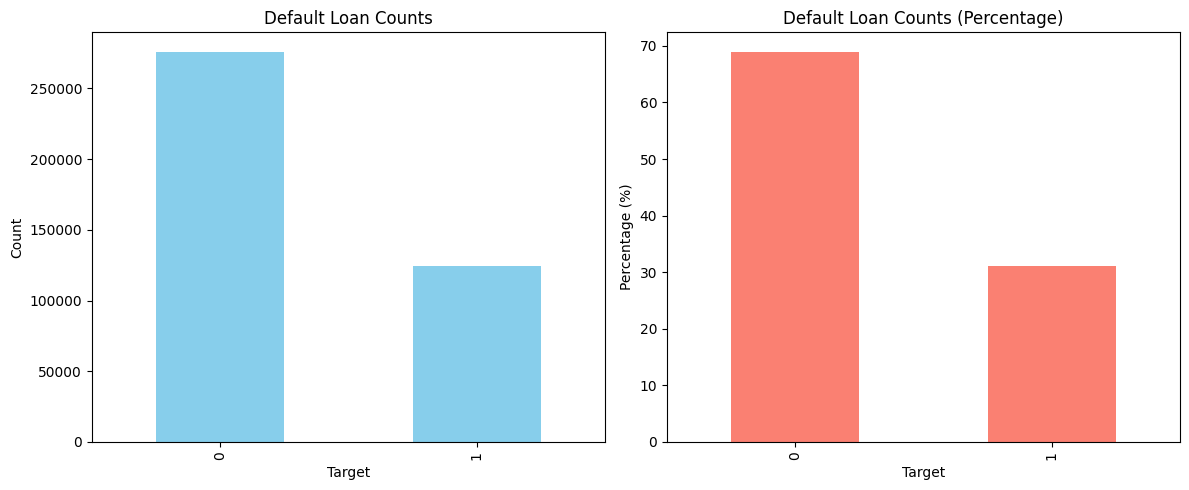

In [ ]:
value_counts = df['target'].value_counts()
percentages = df['target'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot of counts
value_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Default Loan Counts')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')

# Bar plot of percentages
percentages.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Default Loan Counts (Percentage)')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Percentage (%)')

# Improve spacing
plt.tight_layout()

# Save the combined plot as JPG
plt.savefig('default_loan_combined.jpg', dpi=300)
plt.show()

In [ ]:
# Counting target values
counts = df["target"].value_counts()
print("Conteggio:\n", counts)

# Percentage of target values
percentages = df["target"].value_counts(normalize=True) * 100
print("\nPercentuale (%):\n", percentages.round(2))

Conteggio:
 target
0    275931
1    124237
Name: count, dtype: int64

Percentuale (%):
 target
0    68.95
1    31.05
Name: proportion, dtype: float64


In [10]:
# Convert columns from one data type to another
df['VerificationType'] = df['VerificationType'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].astype('category')
df['OccupationArea'] = df['OccupationArea'].astype('category')
df['HomeOwnershipType'] = df['HomeOwnershipType'].astype('category')
df['Rating'] = df['Rating'].astype('category')
df['Status'] = df['Status'].astype('category')
df['CreditScoreEsMicroL'] = df['CreditScoreEsMicroL'].astype('category')
df['ApplicationSignedHour'] = df['ApplicationSignedHour'].astype('category')
df['ApplicationSignedWeekday'] = df['ApplicationSignedWeekday'].astype('category')
df['LanguageCode'] = df['LanguageCode'].astype('category')
df['Country'] = df['Country'].astype('category')
df['AgeGroup'] = df['AgeGroup'].astype('category')
df['LanguageCountryMatch'] = df['LanguageCountryMatch'].astype('category')
df['LoanDuration_Category']= df['LoanDuration_Category'].astype('category')
df['ActiveScheduleFirstPaymentReached']=df['ActiveScheduleFirstPaymentReached'].astype('category')
df['NewCreditCustomer']=df['NewCreditCustomer'].astype('category')
df['Restructured']=df['Restructured'].astype('category')
df["target"] = df["target"].astype("category")


In [11]:
df['LoanDate'] = pd.to_datetime(df['LoanDate'], errors='coerce')
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], errors='coerce')
df['LastPaymentOn'] = pd.to_datetime(df['LastPaymentOn'], errors='coerce')
df['MaturityDate_Original']= pd.to_datetime(df['MaturityDate_Original'], errors='coerce')
df['MaturityDate_Last'] = pd.to_datetime(df['MaturityDate_Last'], errors='coerce')

In [12]:
df.set_index("LoanId", inplace=True)
# Identify categorical columns excluding the target variable "DefaultLoan"
categorical_variables = [col for col in df.select_dtypes(include=['category', 'datetime']).columns if col != "target"]
 # Identify numerical columns
numerical_variables = df.select_dtypes(include=['number']).columns.tolist()

print(f"Colonne categoriali: {categorical_variables}")
print(f"Colonne numeriche: {numerical_variables}")

Colonne categoriali: ['VerificationType', 'Gender', 'Education', 'OccupationArea', 'HomeOwnershipType', 'NewCreditCustomer', 'ActiveScheduleFirstPaymentReached', 'Restructured', 'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'LastPaymentOn', 'EmploymentDurationCurrentEmployer', 'Rating', 'CreditScoreEsMicroL', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'LanguageCode', 'Country', 'Status', 'AgeGroup', 'LanguageCountryMatch', 'LoanDuration_Category']
Colonne numeriche: ['PrincipalOverdueBySchedule', 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Amount', 'IncomeTotal', 'LiabilitiesTotal', 'Interest', 'DebtToIncome', 'FreeCash', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'MonthlyPayment', 'ExistingLiabilities', 'RefinanceLiabilities', 'MonthlyPaymentDay', 'InterestAndPenaltyPaymentsMade', 'PrincipalBalanc

In [7]:
df[numerical_variables].shape[1]

25

In [8]:
df[categorical_variables].shape[1]

24

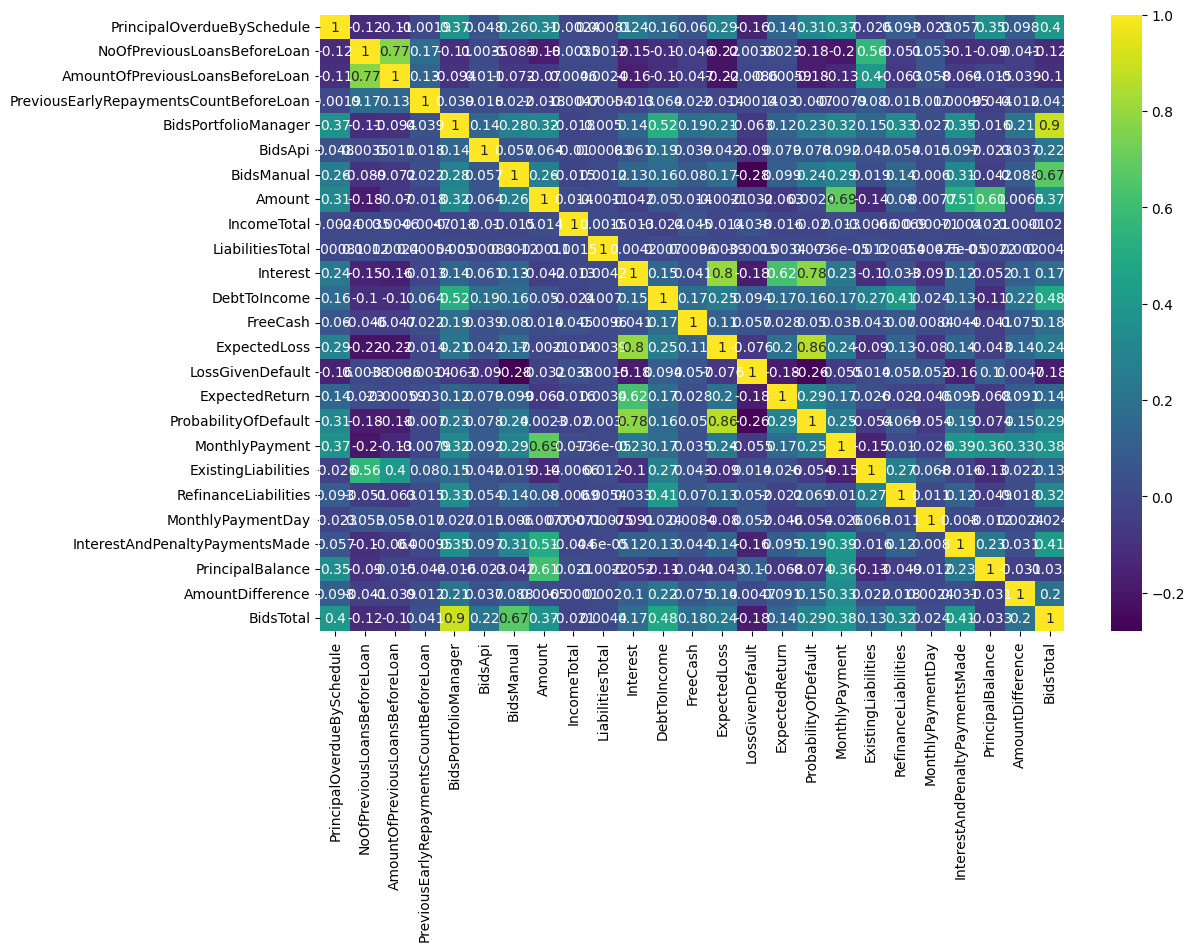

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_variables].corr(), annot=True, cmap='viridis')
plt.savefig('correlation_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

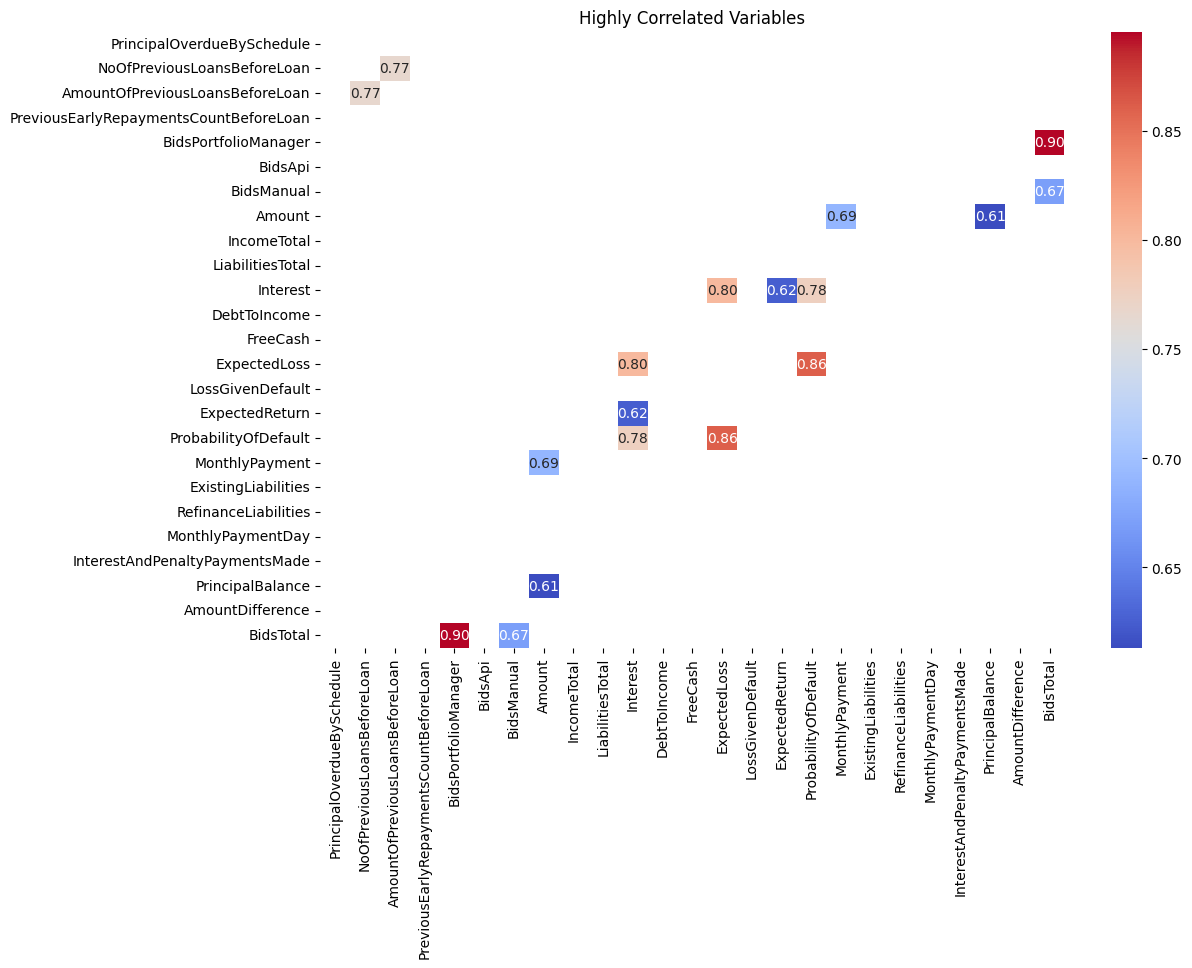

In [ ]:
#Calculates the correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Find variables with absolute correlation greater than a threshold (for example, 0.8)
threshold = 0.6
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Displays only highly related variables
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr_pairs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Highly Correlated Variables")
plt.show()

### Observations from the Correlation Matrix

After analyzing the correlation matrix, the following observations were made:

- **`BidsTotal`** is strongly correlated with **`BidsPortfolioManager`**, **`BidsApi`**, and **`BidsManual`**.  
  This high correlation indicates potential multicollinearity issues when using these features in a model. To mitigate this, it is recommended to retain only one of these features.

- Similarly, **`AmountOfPreviousLoansBeforeLoan`** and **`NoOfPreviousLoansBeforeLoan`** also exhibit strong correlation.  
  To avoid redundancy and multicollinearity, it is advisable to keep only one of these features in the dataset.

- **`Amount`** and **`MonthlyPayment`** exhibit strong correlation, it is better to remove one of them 

By addressing multicollinearity, the model's performance and interpretability can be significantly improved.

Moreover, **`PrincipalOverdueBySchedule`**, **`LossGivenDefault`**, **`ExpectedReturn`**, **`ExpectedLoss`**, **`ProbabilityOfDefaul`** and **`InterestAndPenaltyPaymentsMade`** have been removed because they include information that predict future loans behavior, which conflict with the study's objective of predicting loan defaults. Including such variables could lead to data leakage and compromise the integrity of the predictive model.

In [13]:
df.drop(
    [
    "BidsPortfolioManager",
    "BidsApi",  
    "BidsManual",
    "AmountOfPreviousLoansBeforeLoan",
    "MonthlyPayment",
    "PrincipalOverdueBySchedule",
    "LossGivenDefault",
    "ExpectedReturn",
    "ExpectedLoss",
    "ProbabilityOfDefault",
    "InterestAndPenaltyPaymentsMade",
], 
    axis=1,
    inplace=True
)

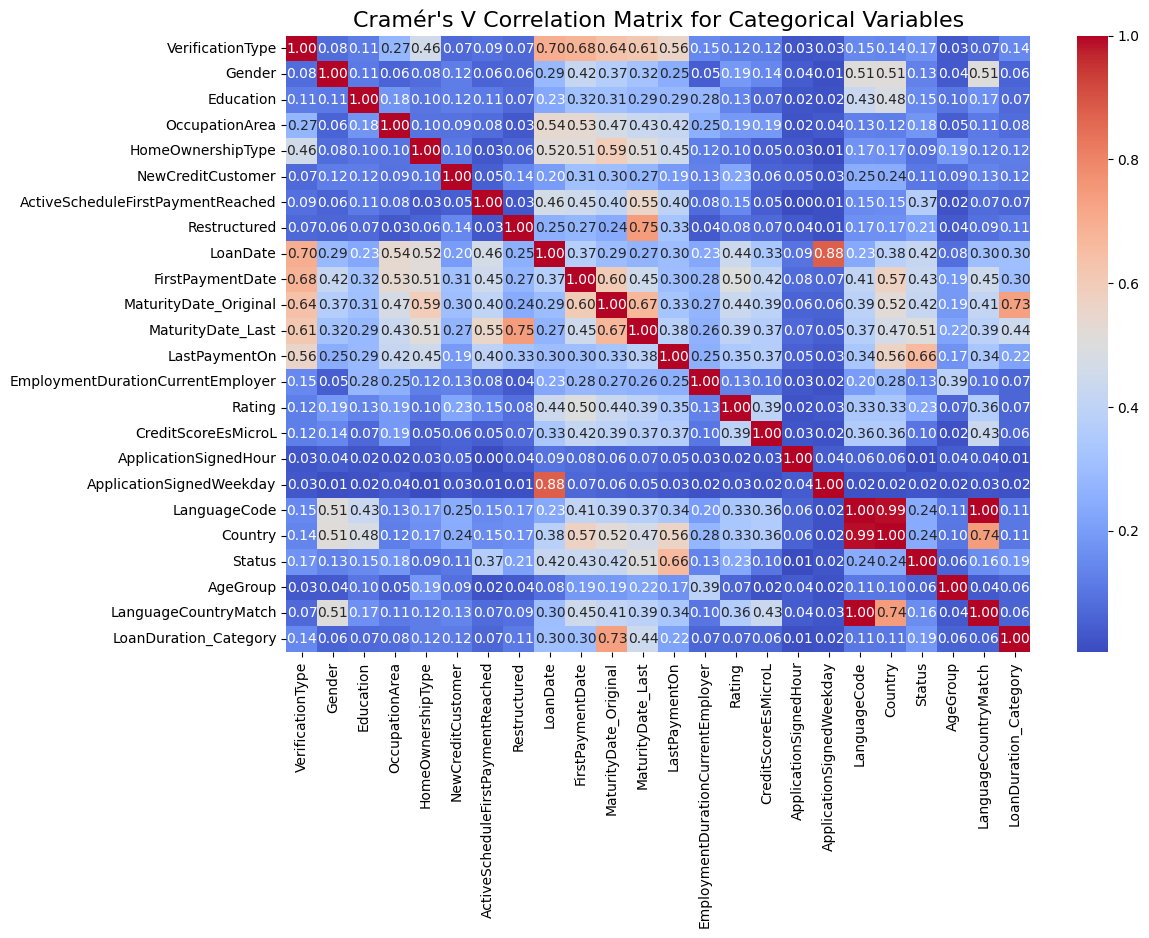

In [16]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Compute the correlation matrix for categorical variables
correlation_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)

for col1 in categorical_variables:
    for col2 in categorical_variables:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

correlation_matrix = correlation_matrix.astype(float)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Correlation Matrix for Categorical Variables", fontsize=16)
plt.savefig("'Cramér's V Correlation.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
df.drop(
    [
    "LanguageCode",
    "MaturityDate_Last",
    "LanguageCountryMatch",
    "LastPaymentOn",
    "Status",
    "Restructured",
    "ActiveScheduleFirstPaymentReached",
], 
    axis=1,
    inplace=True
)

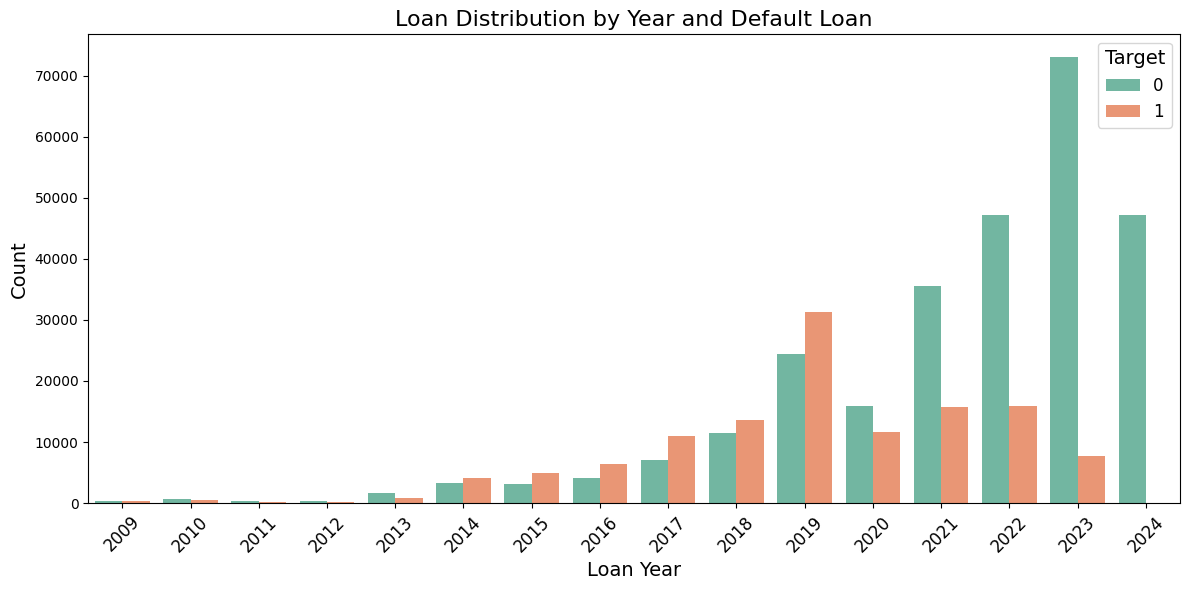

In [18]:

# Extract the year from LoanDate and use it directly
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=df['LoanDate'].dt.year, hue='target', palette='Set2')

# Customize the chart
plt.title("Loan Distribution by Year and Default Loan", fontsize=16)
plt.xlabel("Loan Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Target", fontsize=12, title_fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()

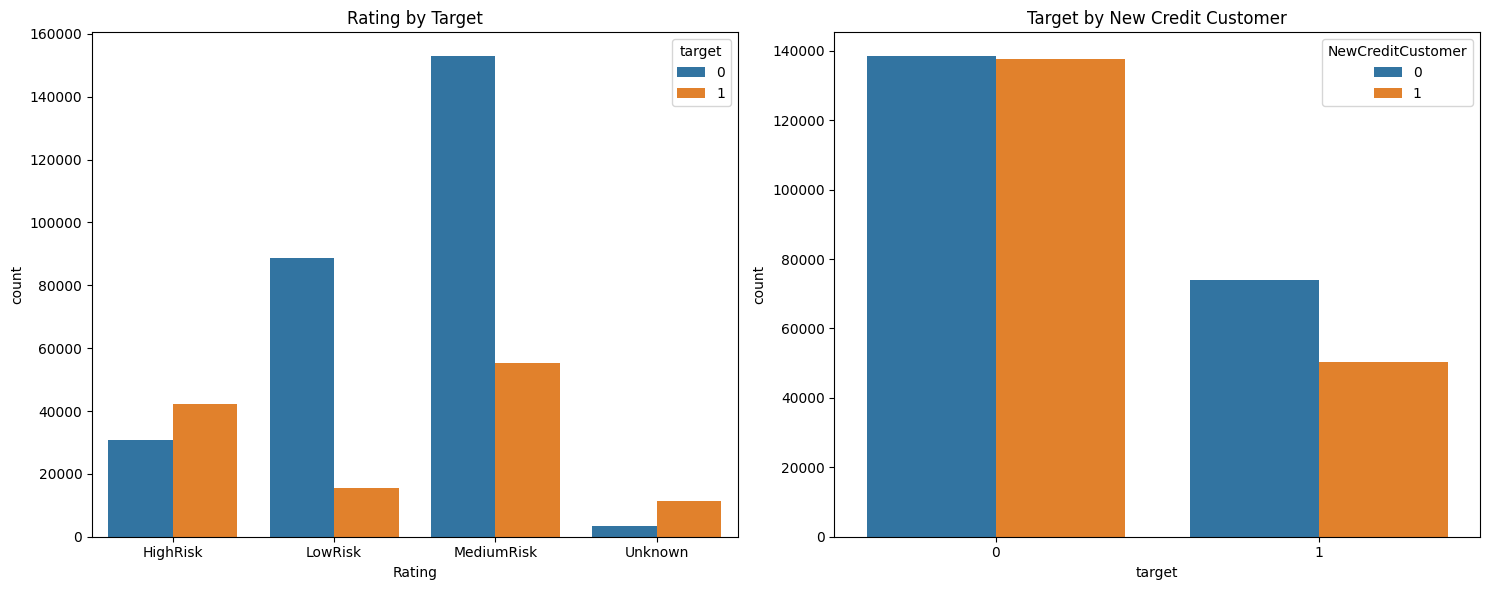

In [15]:
plt.figure(figsize=(15, 6))

# First plot: Rating vs target
plt.subplot(1, 2, 1)
rating = sorted(df.Rating.unique().tolist())
sns.countplot(x='Rating', data=df, hue='target', order=rating)
plt.title('Rating by Target')

# Second plot: Target vs NewCreditCustomer
plt.subplot(1, 2, 2)
target = df.target.unique().tolist()
sns.countplot(x='target', data=df, hue='NewCreditCustomer', order=target)
plt.title('Target by New Credit Customer')

plt.tight_layout()
plt.show()

In [63]:
investments = df.hvplot.hist(
    y='BidsTotal', by='target', subplots=False, 
    width=450, height=450, bins=40, alpha=0.4, 
    title="Total Investments by default loans", 
    xlabel='BidsTotal', ylabel='Counts', legend='top_right'
)
investments

:NdOverlay   [target]
   :Histogram   [BidsTotal]   (Count)

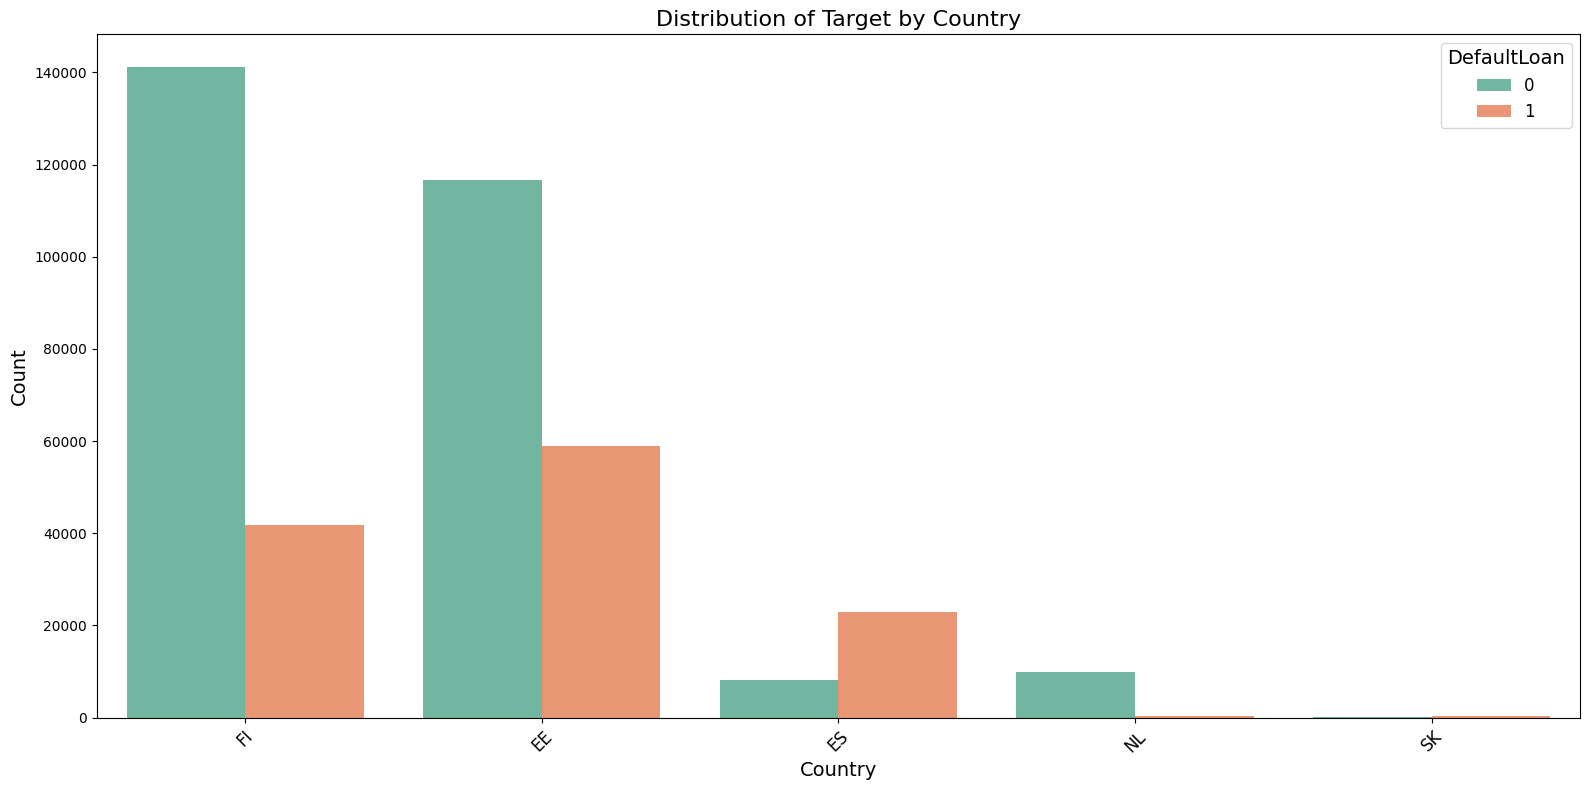

In [29]:
plt.figure(figsize=(16, 8))  

sns.countplot(
    data=df,
    x='Country',
    hue='target',
    order=df['Country'].value_counts().index,  # Order countries by frequency
    palette=  'Set2'
)

plt.title("Distribution of Target by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.legend(title="DefaultLoan", fontsize=12, title_fontsize=14)


plt.tight_layout()
plt.show()

In [33]:
freq_table = df.groupby(['Country', 'target'], observed=True).size().unstack(fill_value=0)
print(freq_table)

target        0      1
Country               
EE       116663  58944
ES         8232  22879
FI       141219  41735
NL         9791    409
SK           26    270


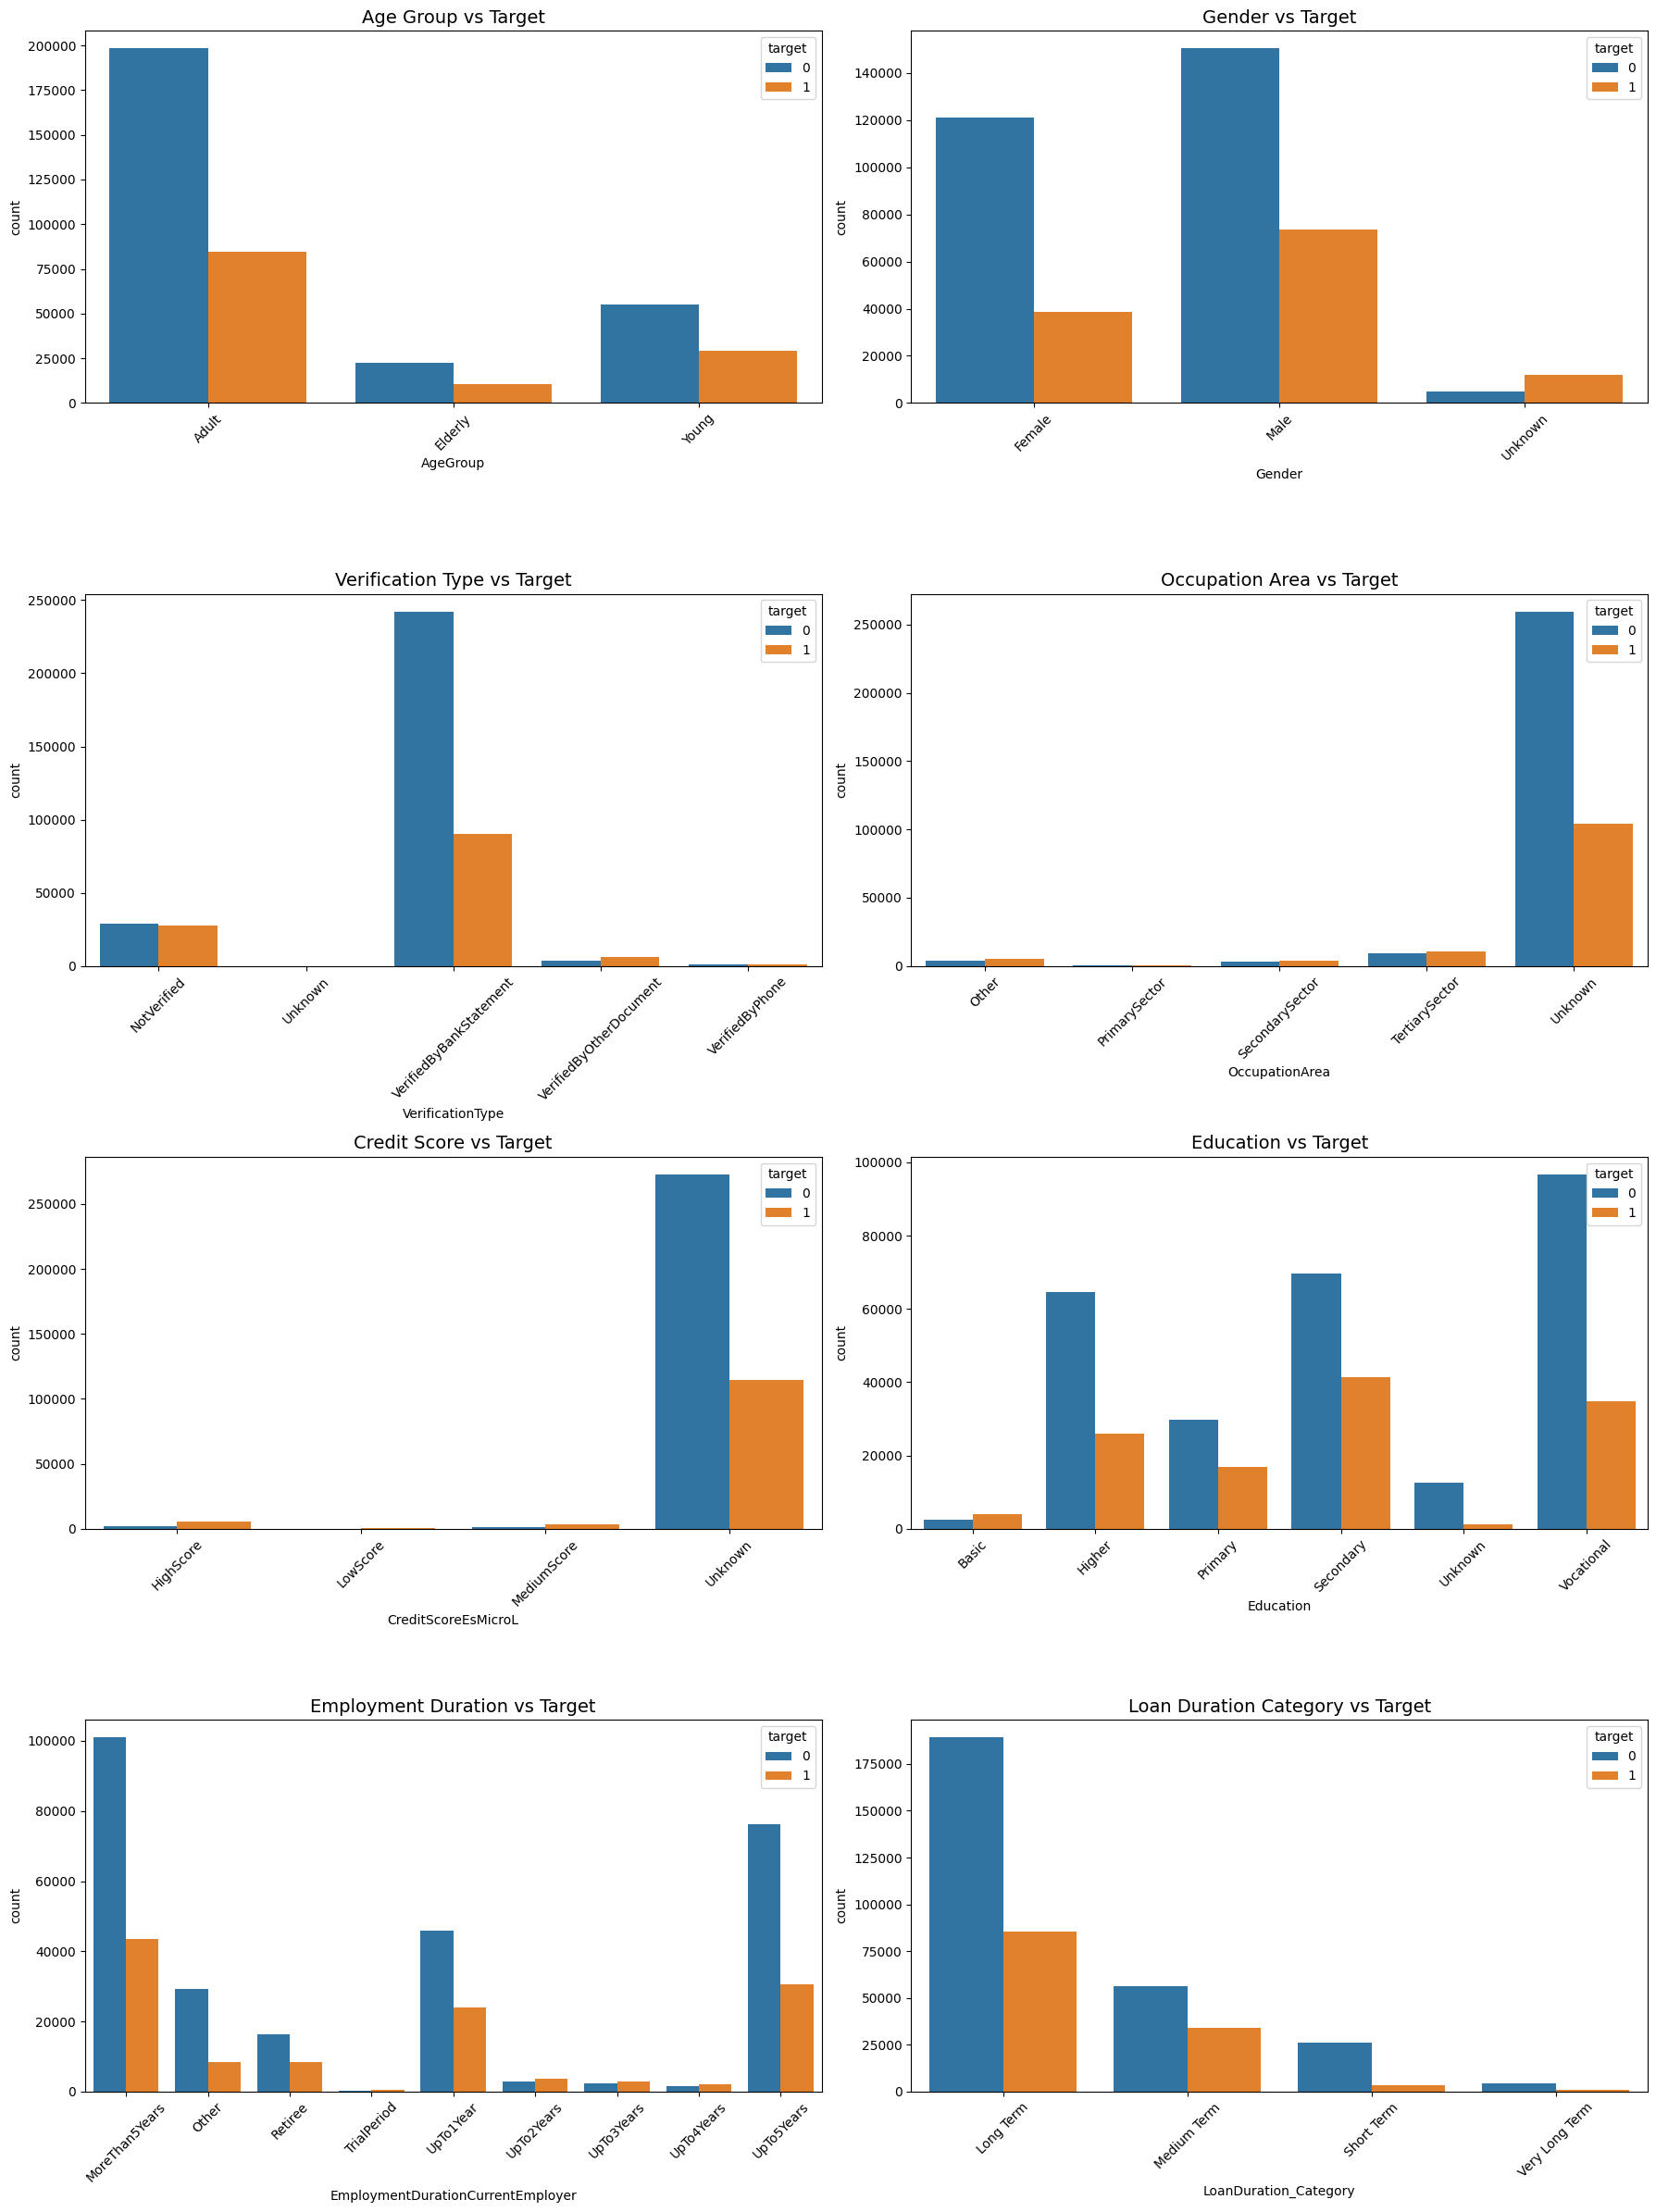

In [34]:
plt.figure(figsize=(18, 24)) 

plt.subplot(4, 2, 1)
sns.countplot(x='AgeGroup', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)  
plt.title("Age Group vs Target", fontsize=14)

plt.subplot(4, 2, 2)
sns.countplot(x='Gender', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Gender vs Target", fontsize=14)

plt.subplot(4, 2, 3)
sns.countplot(x='VerificationType', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Verification Type vs Target", fontsize=14)

plt.subplot(4, 2, 4)
sns.countplot(x='OccupationArea', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Occupation Area vs Target", fontsize=14)

plt.subplot(4, 2, 5)
sns.countplot(x='CreditScoreEsMicroL', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Credit Score vs Target", fontsize=14)

plt.subplot(4, 2, 6)
sns.countplot(x='Education', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Education vs Target", fontsize=14)

plt.subplot(4, 2, 7)
sns.countplot(x='EmploymentDurationCurrentEmployer', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Employment Duration vs Target", fontsize=14)

plt.subplot(4, 2, 8)
sns.countplot(x='LoanDuration_Category', data=df, hue='target')
plt.xticks(rotation=45, fontsize=10)
plt.title("Loan Duration Category vs Target", fontsize=14)

plt.tight_layout() 
plt.show()

In [8]:
df.drop(
    [
    "CreditScoreEsMicroL",
    "OccupationArea",
], 
    axis=1,
    inplace=True
)

In [36]:
df.shape

(400168, 30)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400168 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 41 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   VerificationType                        400168 non-null  category      
 1   Gender                                  400168 non-null  category      
 2   Education                               400168 non-null  category      
 3   HomeOwnershipType                       400168 non-null  category      
 4   PrincipalOverdueBySchedule              400168 non-null  int64         
 5   NoOfPreviousLoansBeforeLoan             400168 non-null  int64         
 6   PreviousEarlyRepaymentsCountBeforeLoan  400168 non-null  int64         
 7   Amount                                  400168 non-null  int64         
 8   IncomeTotal                             400168 non-nul

In [9]:
# Filter the DataFrame to remove rows with 'Unknown' values in key categorical columns
filtered_data = df[
    (df["HomeOwnershipType"] != "Unknown") & # Exclude rows where HomeOwnershipType is 'Unknown'
    (df["Rating"] != "Unknown") & # Exclude rows where Rating is 'Unknown'
    (df["Gender"] != "Unknown") & # Exclude rows where Gender is 'Unknown'
    (df["Education"] != "Unknown")& # Exclude rows where Education is 'Unknown'
    (df["Amount"] > 0) & # Keep only rows with Amount greater than 0
    (df["Interest"] > 0) # Keep only rows with Interest greater than 0
]

print(f"Observations remaining after filter: {filtered_data.shape[0]}")

Observations remaining after filter: 356540


In [10]:
train_set, test_set = train_test_split(filtered_data, test_size=0.3, random_state=42)

In [11]:
X_train = train_set.drop(["target"], axis=1)
X_test = test_set.drop(["target"], axis=1)

y_train = train_set["target"]
y_test = test_set["target"]

In [12]:
# Select the categorical variables and exclude those specified
final_categorical_variables = [
    col for col in filtered_data.select_dtypes(include=['category']).columns 
    if col not in ["target", "ApplicationSignedHour", "AgeGroup", "LoanDuration_Category"]
]

In [30]:
final_categorical_variables

['VerificationType',
 'Gender',
 'Education',
 'HomeOwnershipType',
 'NewCreditCustomer',
 'EmploymentDurationCurrentEmployer',
 'Rating',
 'ApplicationSignedWeekday',
 'Country']

In [13]:
final_numerical_variables= filtered_data.select_dtypes(include=['number']).columns.tolist()
final_numerical_variables

['NoOfPreviousLoansBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'Amount',
 'IncomeTotal',
 'LiabilitiesTotal',
 'Interest',
 'DebtToIncome',
 'FreeCash',
 'ExistingLiabilities',
 'RefinanceLiabilities',
 'MonthlyPaymentDay',
 'PrincipalBalance',
 'AmountDifference',
 'BidsTotal']

In [14]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [16]:
from sklearn.metrics import roc_auc_score
def print_score(true, pred, proba=None, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        if proba is not None:
            roc_auc = roc_auc_score(true, proba)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        if proba is not None: 
            roc_auc = roc_auc_score(true, proba)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [17]:
nominal_variables=["AgeGroup","LoanDuration_Category", "ApplicationSignedHour"]

In [18]:
#logistic regression pipeline
logistic_pipe = Pipeline(
    steps=[
        ( 
            "RD_engineering",
            DatetimeSubtraction(
                variables="MaturityDate_Original",
                reference="LoanDate",
                output_unit="D",
                drop_original=False,
                new_variables_names=["duration_payment"],
            ),
        ),
        (
            "OHE_encoding",
            OneHotEncoder(
                top_categories=None,
                drop_last=True,
                drop_last_binary=True,
                ignore_format=False,
                variables=final_categorical_variables,
            ),
        ),       
        (
            "Nominal_encoding",
            OrdinalEncoder(
                variables=nominal_variables,
            ),
        ),
        (  
            "Drop columns",
            ColumnDropperTransformer(
                columns=[
                    "FirstPaymentDate",
                    "MaturityDate_Original",
                    "LoanDate",            
                ]
            ),
        ),
        (
            "Power_transform",
            PowerTransformer(method="yeo-johnson"),
        ),
        (
            "Standardize",
            StandardScaler(),
        ),
        (
            "Model",
            LogisticRegression(random_state=42, n_jobs=2),
        ),
    ],
    verbose=True,
)
logistic_pipe.fit(X_train, y_train)


[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.5s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.7s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  12.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   4.4s


Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                                          'Country'])),
                ('Nominal_encoding',
                 OrdinalEncoder(variables=['AgeGroup', 'LoanDuration_Category',
                                           'ApplicationSignedHour'])),
                ('Drop columns',
                 <src.class_transformers.ColumnDropperTransformer object at 0x0000024A44D08280>),
                ('Power_transform', PowerTransformer()),
                ('Standardize', StandardScaler()),
                ('Model', LogisticRegression(n_jobs=2, random_state=42))],
         verbose=True)

In [47]:
y_train_pred = logistic_pipe.predict(X_train)
y_train_proba = logistic_pipe.predict_proba(X_train)[:, 1]
y_test_pred = logistic_pipe.predict(X_test)
y_test_proba = logistic_pipe.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 79.00%
ROC AUC Score: 0.8340
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.815401      0.688289  0.789985       0.751845       0.779135
recall          0.912794      0.482354  0.789985       0.697574       0.789985
f1-score        0.861353      0.567208  0.789985       0.714281       0.777431
support    178371.000000  71207.000000  0.789985  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[162816  15555]
 [ 36860  34347]]

Test Result:
Accuracy Score: 78.96%
ROC AUC Score: 0.8325
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.815954      0.684490  0.789589       0.750222       0.778564
recall         0.911577      0.482660  0.789589       0.697118       0.789589
f1-score

In [19]:
scores = cross_val_score(logistic_pipe, X_train, y_train, cv=10, scoring='roc_auc')
print(f"wizard_pipe - Mean ROC AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")

[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.1s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=   9.9s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   2.5s
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   1.4s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.3s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  10.0s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   2.6s
[Pipel

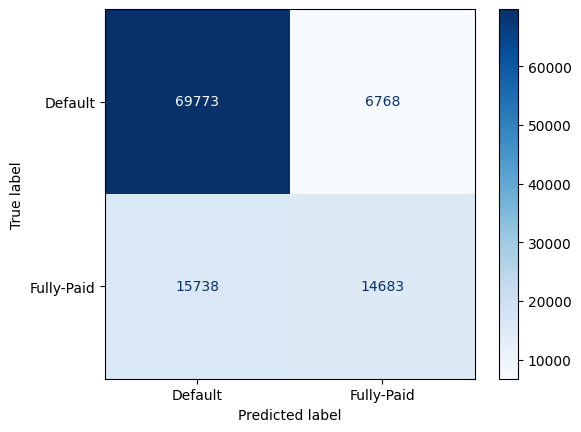

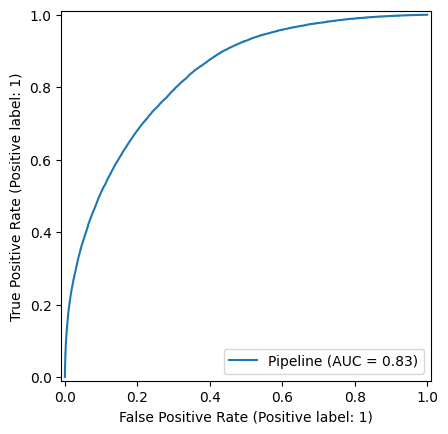

In [20]:
disp = ConfusionMatrixDisplay.from_estimator(
    logistic_pipe, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(logistic_pipe, X_test, y_test)

In [49]:
from sklearn.model_selection import StratifiedKFold
train_roc_auc_scores = []
test_roc_auc_scores = []
# Configura StratifiedKFold con 10 fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Itera sui fold
fold = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f"Fold {fold}:\n{'='*50}")
    
    # Dividi i dati in train e test per il fold corrente
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Allena il modello sul fold corrente
    logistic_pipe.fit(X_train_fold, y_train_fold)
    
    # Predizioni sul train e test del fold corrente
    y_train_pred_fold = logistic_pipe.predict(X_train_fold)
    y_train_proba_fold = logistic_pipe.predict_proba(X_train_fold)[:, 1]
    y_test_pred_fold = logistic_pipe.predict(X_test_fold)
    y_test_proba_fold = logistic_pipe.predict_proba(X_test_fold)[:, 1]
# Calcola e salva i ROC AUC Score
    train_roc_auc = roc_auc_score(y_train_fold, y_train_proba_fold)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_proba_fold)
    train_roc_auc_scores.append(train_roc_auc)
    test_roc_auc_scores.append(test_roc_auc)
    
    # Stampa i risultati per il train e il test del fold corrente
    print_score(y_train_fold, y_train_pred_fold, proba=y_train_proba_fold, train=True)
    print_score(y_test_fold, y_test_pred_fold, proba=y_test_proba_fold, train=False)
    
    fold += 1

Fold 1:
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.5s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   4.5s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  16.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.3s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   4.0s
Train Result:
Accuracy Score: 78.98%
ROC AUC Score: 0.8336
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.815136      0.688186  0.789801       0.751661       0.778916
recall          0.912928      0.481377  0.789801       0.697152       0.789801
f1-score        0.861265      0.566497  0.789801       0.713881       0.777164
support    160533.000000  64087.000000  0.789801 

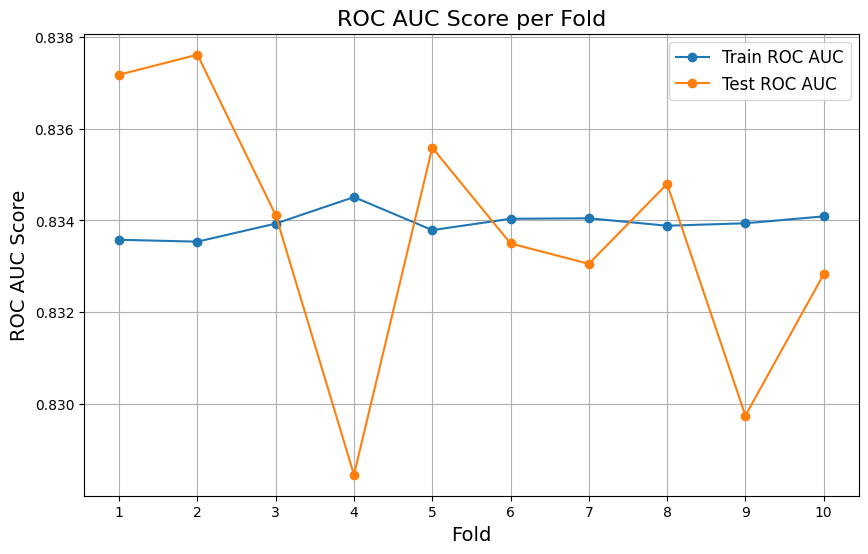

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_roc_auc_scores) + 1), train_roc_auc_scores, label='Train ROC AUC', marker='o')
plt.plot(range(1, len(test_roc_auc_scores) + 1), test_roc_auc_scores, label='Test ROC AUC', marker='o')
plt.title('ROC AUC Score per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.xticks(range(1, len(train_roc_auc_scores) + 1))
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:

# Definition of the parameter space
param_distributions = {
    'Model__penalty': ['l1', 'l2', 'elasticnet'], # Type of regularization to use
    'Model__C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'Model__solver': ['saga'],  # Optimization algorithm to use
    'Model__l1_ratio': [0.1,0.5,0.9],  # ElasticNet mixing parameter (only used if penalty='elasticnet')
    'Model__max_iter': [1000] # Maximum number of iterations for the solver
}

In [ ]:
random_search_log = RandomizedSearchCV(
    estimator=logistic_pipe,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='roc_auc',  # Evaluation metric to use
    n_jobs=1,  # Number of parallel jobs (1 = no parallelism)
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42, 
)

In [ ]:
random_search_log.fit(X_train, y_train)

In [93]:
best_params = random_search_log.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'Model__solver': 'saga', 'Model__penalty': 'l2', 'Model__max_iter': 1000, 'Model__l1_ratio': 0.5, 'Model__C': 10}


In [94]:
best_model = random_search_log.best_estimator_
print("Best model found:", best_model)

Best model found: Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                 OrdinalEncoder(variables=['AgeGroup', 'LoanDuration_Category',
                                           'ApplicationSignedHour'])),
                ('Drop columns',
                 <src.class_transformers.ColumnDropperTransformer object at 0x000001C854CECBE0>),
          

In [96]:
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 79.00%
ROC AUC Score: 0.8340
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.815435      0.688353  0.790022       0.751894       0.779177
recall          0.912800      0.482467  0.790022       0.697633       0.790022
f1-score        0.861374      0.567307  0.790022       0.714341       0.777474
support    178371.000000  71207.000000  0.790022  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[162817  15554]
 [ 36852  34355]]

Test Result:
Accuracy Score: 78.96%
ROC AUC Score: 0.8325
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.815949      0.684426   0.78957       0.750188       0.778543
recall         0.911551      0.482660   0.78957       0.697105       0.789570
f1-score

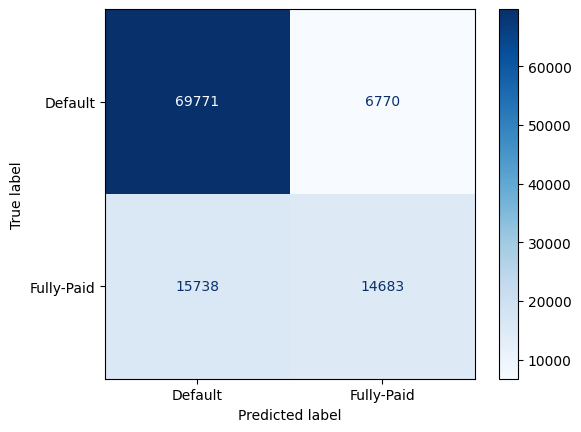

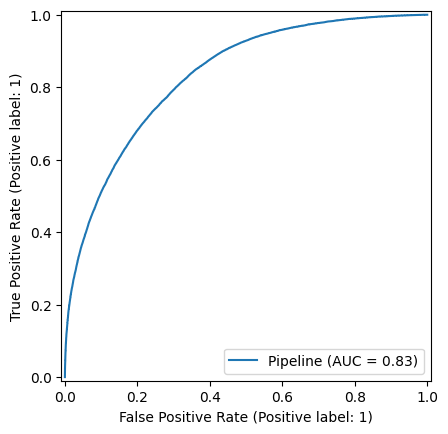

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(best_model, X_test, y_test)

In [ ]:
test_accuracy = best_model.score(X_test, y_test)
print(f'Best pameters: {random_search_log.best_params_}')
print(f'CV score: {round(random_search_log.best_score_,2)}')
print(f'Test score: {round(test_accuracy,2)}')

Best pameters: {'Model__C': np.float64(4.763702231821117), 'Model__l1_ratio': np.float64(0.5632755719763837), 'Model__max_iter': 1000, 'Model__penalty': 'l2', 'Model__solver': 'saga'}
CV score: 0.83
Test score: 0.79


In [ ]:
print("Best parameters found:", random_search_log.best_params_)
print("Best ROC AUC score:", random_search_log.best_score_)
print("Best estimator:", random_search_log.best_estimator_)

Best parameters found: {'Model__C': np.float64(4.763702231821117), 'Model__l1_ratio': np.float64(0.5632755719763837), 'Model__max_iter': 1000, 'Model__penalty': 'l2', 'Model__solver': 'saga'}
Best ROC AUC score: 0.8337035182085024
Best estimator: Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                 OrdinalEncoder(variables=['AgeGroup', 'LoanDur

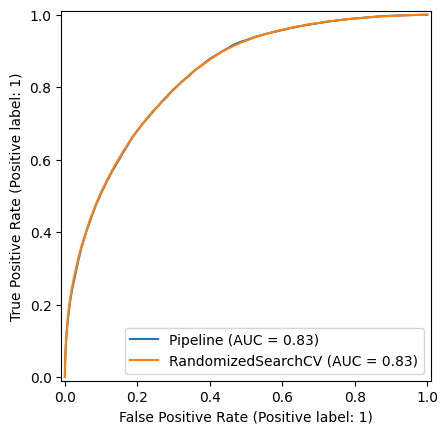

In [ ]:
disp = RocCurveDisplay.from_estimator(logistic_pipe, X_test, y_test)
RocCurveDisplay.from_estimator(random_search_log, X_test, y_test, ax=disp.ax_)

In [21]:

decision_tree_pipe = Pipeline(
    steps=[
        ( 
            "RD_engineering",
            DatetimeSubtraction(
                variables="MaturityDate_Original",
                reference="LoanDate",
                output_unit="D",
                drop_original=False,
                new_variables_names=["duration_payment"],
            ),
        ),
        (
            "OHE_encoding",
            OneHotEncoder(
                top_categories=None,
                drop_last=True,
                drop_last_binary=True,
                ignore_format=False,
                variables=final_categorical_variables,
            ),
        ),       
        (
            "Nominal_encoding",
            OrdinalEncoder(
                variables=nominal_variables,
            ),
        ),
        (  
            "Drop columns",
            ColumnDropperTransformer(
                columns=[
                    "FirstPaymentDate",
                    "MaturityDate_Original",
                    "LoanDate",            
                ]
            ),
        ),
        (
            "Power_transform",
            PowerTransformer(method="yeo-johnson"),
        ),
        (
            "Standardize",
            StandardScaler(),
        ),
        (
            "Model",
            DecisionTreeClassifier(
                random_state=42,
                max_depth=10,  # Limit the maximum depth of the tree to prevent overfitting
                min_samples_split=10,  # Minimum number of samples required to split an internal node
                min_samples_leaf=5,  # Minimum number of samples required to be at a leaf node
                max_features="sqrt",  # Number of features to consider when looking for the best split: square root of total features
            ),
        ),
    ],
    verbose=True,
)

decision_tree_pipe.fit(X_train, y_train)

[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.3s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  11.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   0.6s


Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                 OrdinalEncoder(variables=['AgeGroup', 'LoanDuration_Category',
                                           'ApplicationSignedHour'])),
                ('Drop columns',
                 <src.class_transformers.ColumnDropperTransformer object at 0x0000024A44F4AA10>),
                ('Power_transform', PowerTransformer()),
                ('Standardize', StandardScaler()),
                ('Model',
                 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                                        min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))],
         verbose=True)

In [37]:
y_train_pred= decision_tree_pipe.predict(X_train)
y_train_proba = decision_tree_pipe.predict_proba(X_train)[:, 1]
y_test_pred = decision_tree_pipe.predict(X_test)
y_test_proba = decision_tree_pipe.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 78.32%
ROC AUC Score: 0.8246
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.804336      0.688289  0.783218       0.746312       0.771226
recall          0.920632      0.439002  0.783218       0.679817       0.783218
f1-score        0.858563      0.536082  0.783218       0.697323       0.766556
support    178371.000000  71207.000000  0.783218  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[164214  14157]
 [ 39947  31260]]

Test Result:
Accuracy Score: 77.77%
ROC AUC Score: 0.8169
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.802509      0.668033  0.777669       0.735271       0.764263
recall         0.914307      0.433878  0.777669       0.674093       0.777669
f1-score

In [22]:
scores=cross_val_score(decision_tree_pipe, X_train, y_train, cv=10, scoring='roc_auc')
print(f"wizard_pipe - Mean ROC AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")

[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.0s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=   9.9s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   0.5s
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   2.9s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=   9.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   0.5s
[Pipel

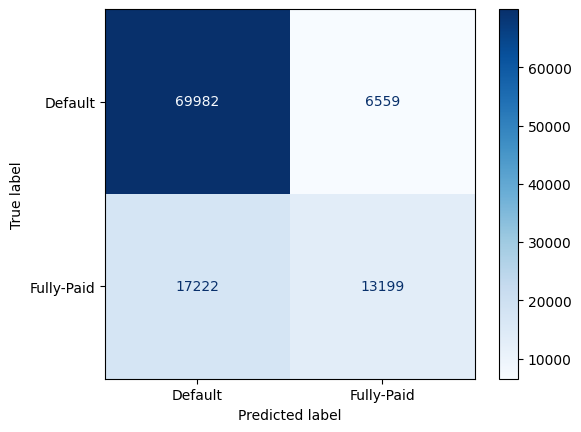

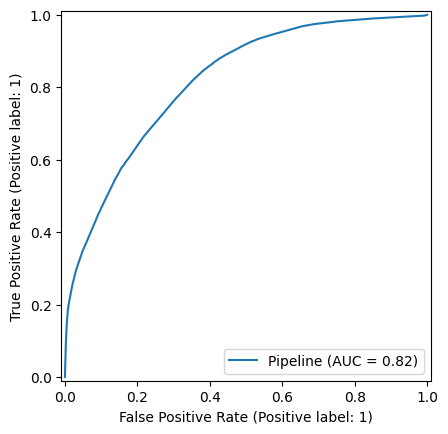

In [23]:
disp = ConfusionMatrixDisplay.from_estimator(
    decision_tree_pipe, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(decision_tree_pipe, X_test, y_test)

In [52]:
train_roc_auc_scores_dt = []
test_roc_auc_scores_dt = []
# Configura StratifiedKFold con 10 fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Itera sui fold
fold = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f"Fold {fold}:\n{'='*50}")
    
    # Dividi i dati in train e test per il fold corrente
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Allena il modello sul fold corrente
    decision_tree_pipe.fit(X_train_fold, y_train_fold)
    
    # Predizioni sul train e test del fold corrente
    y_train_pred_fold = decision_tree_pipe.predict(X_train_fold)
    y_train_proba_fold = decision_tree_pipe.predict_proba(X_train_fold)[:, 1]
    y_test_pred_fold = decision_tree_pipe.predict(X_test_fold)
    y_test_proba_fold = decision_tree_pipe.predict_proba(X_test_fold)[:, 1]
# Calcola e salva i ROC AUC Score
    train_roc_auc = roc_auc_score(y_train_fold, y_train_proba_fold)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_proba_fold)
    train_roc_auc_scores_dt.append(train_roc_auc)
    test_roc_auc_scores_dt.append(test_roc_auc)
    
    # Stampa i risultati per il train e il test del fold corrente
    print_score(y_train_fold, y_train_pred_fold, proba=y_train_proba_fold, train=True)
    print_score(y_test_fold, y_test_pred_fold, proba=y_test_proba_fold, train=False)
    
    fold += 1

Fold 1:
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.5s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   4.6s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  17.2s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.4s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   0.9s
Train Result:
Accuracy Score: 77.86%
ROC AUC Score: 0.8229
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.804034      0.669237  0.778586       0.736635       0.765574
recall          0.912629      0.442820  0.778586       0.677724       0.778586
f1-score        0.854896      0.532979  0.778586       0.693938       0.763049
support    160533.000000  64087.000000  0.778586 

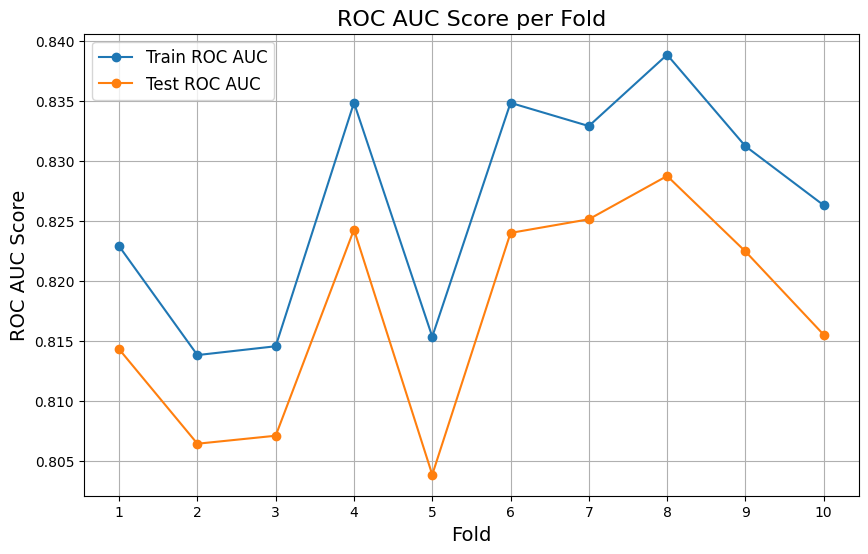

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_roc_auc_scores_dt) + 1), train_roc_auc_scores_dt, label='Train ROC AUC', marker='o')
plt.plot(range(1, len(test_roc_auc_scores_dt) + 1), test_roc_auc_scores_dt, label='Test ROC AUC', marker='o')
plt.title('ROC AUC Score per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.xticks(range(1, len(train_roc_auc_scores_dt) + 1))
plt.legend(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
param_distributions_dt = {
    'Model__max_depth': [3, 5, 7, 10, 15, None], # Maximum depth of the tree (None means unlimited)
    'Model__min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node
    'Model__min_samples_leaf': [1, 2, 5, 10], # Minimum number of samples required to be at a leaf node
    'Model__max_features': ['sqrt', 'log2', None], # Number of features to consider when looking for the best split
    'Model__criterion': ['gini', 'entropy'], # Function to measure the quality of a split
    'Model__splitter': ['best', 'random'], # Strategy used to choose the split at each node
}

random_search_dt = RandomizedSearchCV(
    estimator=decision_tree_pipe,
    param_distributions=param_distributions_dt,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.4s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  11.8s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=   1.9s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('RD_engineering',
                                              DatetimeSubtraction(new_variables_names=['duration_payment'],
                                                                  reference='LoanDate',
                                                                  variables='MaturityDate_Original')),
                                             ('OHE_encoding',
                                              OneHotEncoder(drop_last=True,
                                                            drop_last_binary=True,
                                                            variables=['VerificationType',
                                                                       'Gender',
                                                                       'Education',
                                                                       'HomeOwnershipType',
                                                                       'NewCreditCustomer',
                                                                       'Emplo...
                                                                     random_state=42))],
                                      verbose=True),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'Model__criterion': ['gini', 'entropy'],
                                        'Model__max_depth': [3, 5, 7, 10, 15,
                                                             None],
                                        'Model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'Model__min_samples_leaf': [1, 2, 5,
                                                                    10],
                                        'Model__min_samples_split': [2, 5, 10,
                                                                     20],
                                        'Model__splitter': ['best', 'random']},
                   random_state=42, scoring='roc_auc', verbose=2)

In [39]:
best_params_dt = random_search_dt.best_params_
print("Best parameters found:", best_params_dt)
print("Best parameters found:", random_search_dt.best_params_)
print("Best ROC AUC score:", random_search_dt.best_score_)
print("Best estimator:", random_search_dt.best_estimator_)

Best parameters found: {'Model__splitter': 'best', 'Model__min_samples_split': 20, 'Model__min_samples_leaf': 2, 'Model__max_features': None, 'Model__max_depth': 5, 'Model__criterion': 'gini'}
Best parameters found: {'Model__splitter': 'best', 'Model__min_samples_split': 20, 'Model__min_samples_leaf': 2, 'Model__max_features': None, 'Model__max_depth': 5, 'Model__criterion': 'gini'}
Best ROC AUC score: 0.8318876931634257
Best estimator: Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer'

In [41]:
best_model_dt = random_search_dt.best_estimator_
y_train_pred = best_model_dt.predict(X_train)
y_train_proba = best_model_dt.predict_proba(X_train)[:, 1]
y_test_pred = best_model_dt.predict(X_test)
y_test_proba = best_model_dt.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)


Train Result:
Accuracy Score: 78.58%
ROC AUC Score: 0.8334
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.816911      0.669143  0.785834       0.743027       0.774752
recall          0.902641      0.493238  0.785834       0.697940       0.785834
f1-score        0.857639      0.567881  0.785834       0.712760       0.774968
support    178371.000000  71207.000000  0.785834  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[161005  17366]
 [ 36085  35122]]

Test Result:
Accuracy Score: 78.53%
ROC AUC Score: 0.8317
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.817046      0.665880  0.785288       0.741463       0.774053
recall         0.901909      0.491864  0.785288       0.696886       0.785288
f1-score

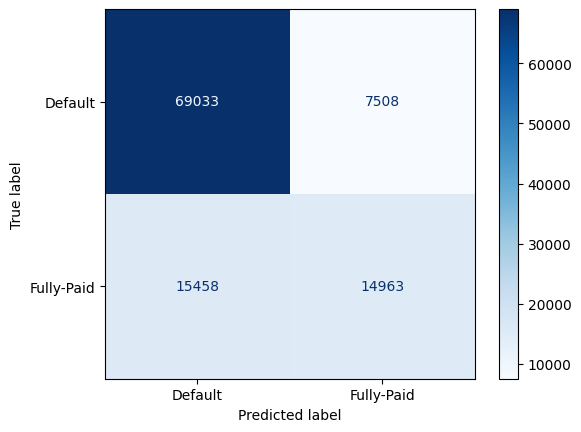

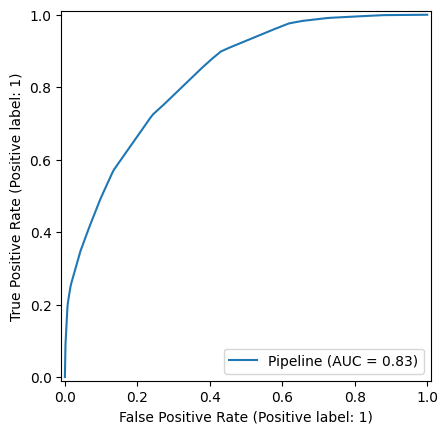

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model_dt, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(best_model_dt, X_test, y_test)

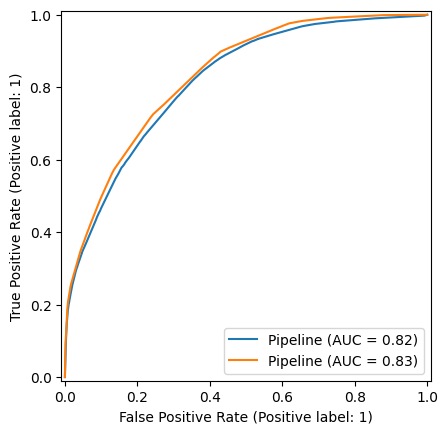

In [44]:
disp = RocCurveDisplay.from_estimator(decision_tree_pipe, X_test, y_test)
RocCurveDisplay.from_estimator(best_model_dt, X_test, y_test, ax=disp.ax_)

In [ ]:

xgboost_pipe = Pipeline(
    steps=[
        (
            "RD_engineering",
            DatetimeSubtraction(
                variables="MaturityDate_Original",
                reference="LoanDate",
                output_unit="D",
                drop_original=False,
                new_variables_names=["duration_payment"],
            ),
        ),
        (
            "OHE_encoding",
            OneHotEncoder(
                top_categories=None,
                drop_last=True,
                drop_last_binary=True,
                ignore_format=False,
                variables=final_categorical_variables,
            ),
        ),
        (
            "Nominal_encoding",
            OrdinalEncoder(
                variables=nominal_variables,
            ),
        ),
        (
            "Drop columns",
            ColumnDropperTransformer(
                columns=[
                    "FirstPaymentDate",
                    "MaturityDate_Original",
                    "LoanDate",
                ]
            ),
        ),
        (
            "Model",
            XGBClassifier(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=6,
                subsample=0.9,
                colsample_bytree=0.9,
                random_state=42,
                eval_metric="logloss",
            ),
        ),
    ],
    verbose=True,
)

# Fit the pipeline
xgboost_pipe.fit(X_train, y_train)

[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   3.6s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipeline] ............. (step 5 of 5) Processing Model, total=   4.8s


Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))],
         verbose=True)

In [60]:
y_train_pred= xgboost_pipe.predict(X_train)
y_train_proba = xgboost_pipe.predict_proba(X_train)[:, 1]
y_test_pred = xgboost_pipe.predict(X_test)
y_test_proba = xgboost_pipe.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 82.16%
ROC AUC Score: 0.8871
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.839953      0.752863  0.821551       0.796408       0.815105
recall          0.926933      0.557572  0.821551       0.742252       0.821551
f1-score        0.881302      0.640665  0.821551       0.760984       0.812646
support    178371.000000  71207.000000  0.821551  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[165338  13033]
 [ 31504  39703]]

Test Result:
Accuracy Score: 81.45%
ROC AUC Score: 0.8785
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.835467      0.735679  0.814523       0.785573       0.807087
recall         0.922473      0.542914  0.814523       0.732694       0.814523
f1-score

In [69]:
scores=cross_val_score(xgboost_pipe, X_train, y_train, cv=10, scoring='roc_auc')
print(f"wizard_pipe - Mean ROC AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")

[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   2.0s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   4.1s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipeline] ............. (step 5 of 5) Processing Model, total=   4.2s
[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   3.6s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipeline] ............. (step 5 of 5) Processing Model, total=   3.9s
[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   3.5s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipel

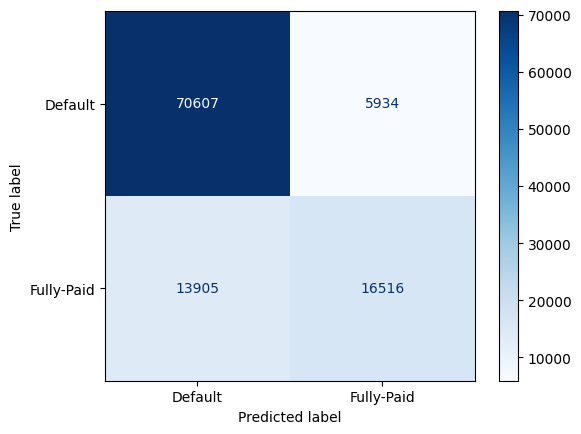

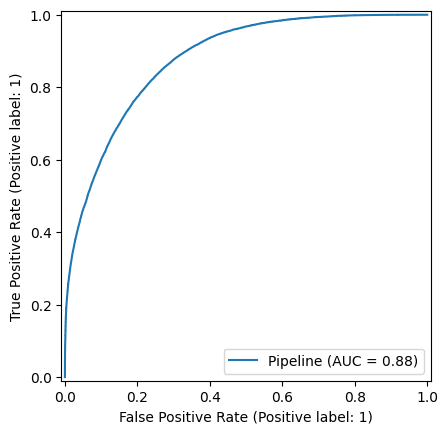

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgboost_pipe, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgboost_pipe, X_test, y_test)

In [ ]:
train_roc_auc_scores_xgb = []
test_roc_auc_scores_xgb = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f"Fold {fold}:\n{'='*50}")
    
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    

    xgboost_pipe.fit(X_train_fold, y_train_fold)
    

    y_train_pred_fold = xgboost_pipe.predict(X_train_fold)
    y_train_proba_fold = xgboost_pipe.predict_proba(X_train_fold)[:, 1]
    y_test_pred_fold = xgboost_pipe.predict(X_test_fold)
    y_test_proba_fold = xgboost_pipe.predict_proba(X_test_fold)[:, 1]
    train_roc_auc = roc_auc_score(y_train_fold, y_train_proba_fold)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_proba_fold)
    train_roc_auc_scores_xgb.append(train_roc_auc)
    test_roc_auc_scores_xgb.append(test_roc_auc)
    
    print_score(y_train_fold, y_train_pred_fold, proba=y_train_proba_fold, train=True)
    print_score(y_test_fold, y_test_pred_fold, proba=y_test_proba_fold, train=False)
    
    fold += 1

Fold 1:
[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   3.3s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipeline] ............. (step 5 of 5) Processing Model, total=   5.2s
Train Result:
Accuracy Score: 82.22%
ROC AUC Score: 0.8875
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.840746      0.753241  0.822175       0.796994       0.815780
recall          0.926725      0.560285  0.822175       0.743505       0.822175
f1-score        0.881644      0.642591  0.822175       0.762118       0.813439
support    160533.000000  64087.000000  0.822175  224620.000000  224620.000000
_______________________________________________
Confusion Matrix: 
 [[148770  11763]
 [ 28180  35907]]

Test Res

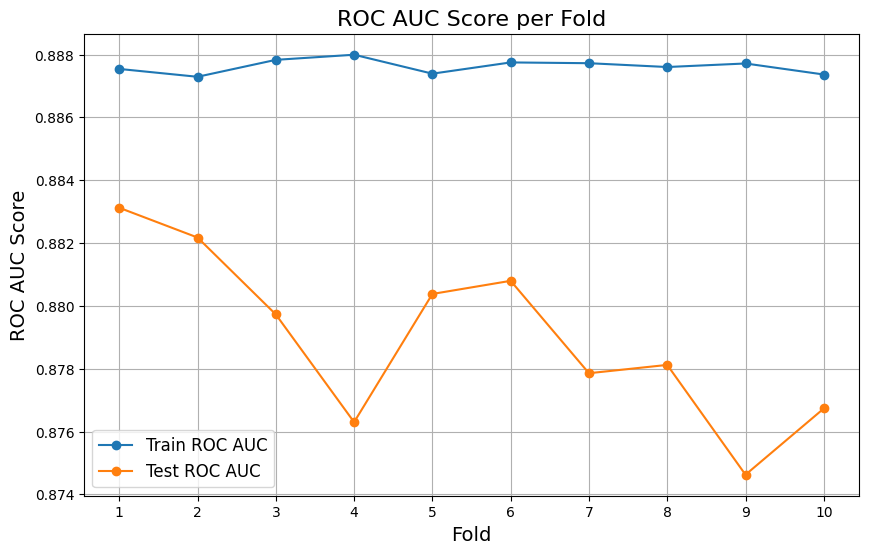

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_roc_auc_scores_xgb) + 1), train_roc_auc_scores_xgb, label='Train ROC AUC', marker='o')
plt.plot(range(1, len(test_roc_auc_scores_xgb) + 1), test_roc_auc_scores_xgb, label='Test ROC AUC', marker='o')
plt.title('ROC AUC Score per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.xticks(range(1, len(train_roc_auc_scores_xgb) + 1))
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
param_distributions = {
    'Model__n_estimators': [50, 100, 200],  # Number of trees in the ensemble
    'Model__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'Model__max_depth': [3, 5, 7, 10],  # Maximum depth of a tree
    'Model__subsample': [0.6, 0.8, 1.0],  # Fraction of samples to be used for each tree
    'Model__colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to be used for each tree
}

In [ ]:
random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_pipe,  
    param_distributions=param_distributions, 
    n_iter=20,  
    scoring='roc_auc',  
    cv=5,  
    verbose=2,  
    random_state=42,  
    n_jobs=-1  
)

# Esecuzione della ricerca
random_search_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Pipeline] .... (step 1 of 5) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 5) Processing OHE_encoding, total=   3.3s
[Pipeline] .. (step 3 of 5) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 5) Processing Drop columns, total=   0.0s
[Pipeline] ............. (step 5 of 5) Processing Model, total=   8.3s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('RD_engineering',
                                              DatetimeSubtraction(new_variables_names=['duration_payment'],
                                                                  reference='LoanDate',
                                                                  variables='MaturityDate_Original')),
                                             ('OHE_encoding',
                                              OneHotEncoder(drop_last=True,
                                                            drop_last_binary=True,
                                                            variables=['VerificationType',
                                                                       'Gender',
                                                                       'Education',
                                                                       'HomeOwnershipType',
                                                                       'NewCreditCustomer',
                                                                       'Emplo...
                                                            multi_strategy=None,
                                                            n_estimators=200,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))],
                                      verbose=True),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'Model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'Model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'Model__max_depth': [3, 5, 7, 10],
                                        'Model__n_estimators': [50, 100, 200],
                                        'Model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
best_params = random_search_xgb.best_params_
print("Best parameters found:", best_params)
print("Best parameters found:", random_search_xgb.best_params_)
print("Best ROC AUC score:", random_search_xgb.best_score_)
print("Best estimator:", random_search_xgb.best_estimator_)


Best parameters found: {'Model__subsample': 0.8, 'Model__n_estimators': 200, 'Model__max_depth': 10, 'Model__learning_rate': 0.05, 'Model__colsample_bytree': 0.6}
Best parameters found: {'Model__subsample': 0.8, 'Model__n_estimators': 200, 'Model__max_depth': 10, 'Model__learning_rate': 0.05, 'Model__colsample_bytree': 0.6}
Best ROC AUC score: 0.8895833754784764
Best estimator: Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurat

In [23]:
best_model = random_search_xgb.best_estimator_
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 87.15%
ROC AUC Score: 0.9375
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.881443      0.838526  0.871503       0.859985       0.869199
recall          0.947671      0.680706  0.871503       0.814188       0.871503
f1-score        0.913358      0.751418  0.871503       0.832388       0.867155
support    178371.000000  71207.000000  0.871503  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[169037   9334]
 [ 22736  48471]]

Test Result:
Accuracy Score: 82.33%
ROC AUC Score: 0.8903
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.848103      0.738343  0.823302       0.793223       0.816886
recall         0.917378      0.586601  0.823302       0.751989       0.823302
f1-score

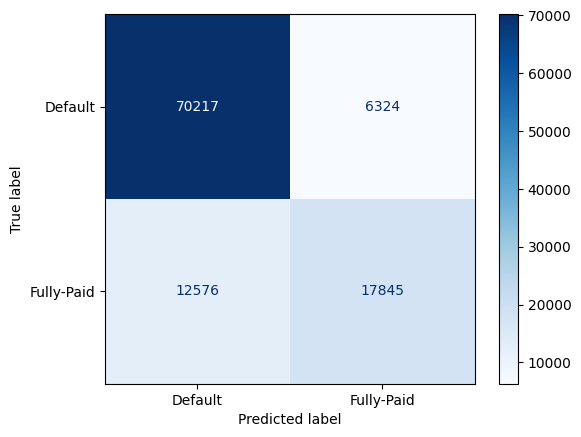

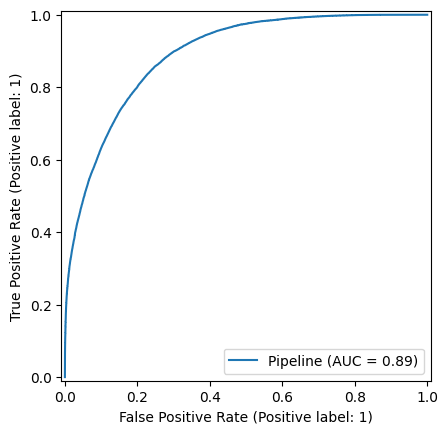

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(best_model, X_test, y_test)


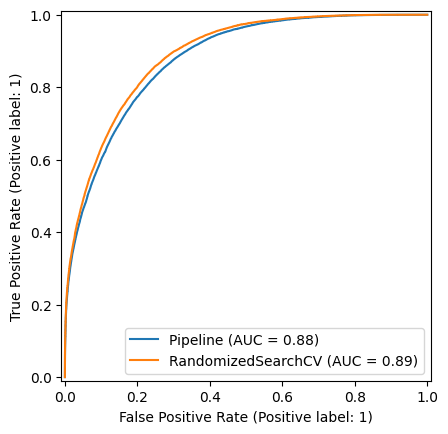

In [25]:
disp = RocCurveDisplay.from_estimator(xgboost_pipe, X_test, y_test)
RocCurveDisplay.from_estimator(random_search_xgb, X_test, y_test, ax=disp.ax_)

In [24]:

random_forest_pipe = Pipeline(
    steps=[
        (
            "RD_engineering",
            DatetimeSubtraction(
                variables="MaturityDate_Original",
                reference="LoanDate",
                output_unit="D",
                drop_original=False,
                new_variables_names=["duration_payment"],
            ),
        ),
        (
            "OHE_encoding",
            OneHotEncoder(
                top_categories=None,
                drop_last=True,
                drop_last_binary=True,
                ignore_format=False,
                variables=final_categorical_variables,
            ),
        ),
        (
            "Nominal_encoding",
            OrdinalEncoder(
                variables=nominal_variables,
            ),
        ),
        (
            "Drop columns",
            ColumnDropperTransformer(
                columns=[
                    "FirstPaymentDate",
                    "MaturityDate_Original",
                    "LoanDate",
                ]
            ),
        ),
        (
            "Power_transform",
            PowerTransformer(method="yeo-johnson"),
        ),
        (
            "Standardize",
            StandardScaler(),
        ),
        (
            "Model",
            RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=42,
                n_jobs=-1,
            ),
        ),
    ],
    verbose=True,
)

random_forest_pipe.fit(X_train, y_train)

[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.4s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.3s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  11.2s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=  13.6s


Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCustomer',
                                          'EmploymentDurationCurrentEmployer',
                                          'Rat...
                 OrdinalEncoder(variables=['AgeGroup', 'LoanDuration_Category',
                                           'ApplicationSignedHour'])),
                ('Drop columns',
                 <src.class_transformers.ColumnDropperTransformer object at 0x0000024A44F4BF70>),
                ('Power_transform', PowerTransformer()),
                ('Standardize', StandardScaler()),
                ('Model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=10, n_jobs=-1,
                                        random_state=42))],
         verbose=True)

In [27]:
y_train_pred= random_forest_pipe.predict(X_train)
y_train_proba = random_forest_pipe.predict_proba(X_train)[:, 1]
y_test_pred = random_forest_pipe.predict(X_test)
y_test_proba = random_forest_pipe.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 80.27%
ROC AUC Score: 0.8643
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.803817      0.796529  0.802735       0.800173       0.801738
recall          0.957734      0.414468  0.802735       0.686101       0.802735
f1-score        0.874051      0.545229  0.802735       0.709640       0.780235
support    178371.000000  71207.000000  0.802735  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[170832   7539]
 [ 41694  29513]]

Test Result:
Accuracy Score: 79.63%
ROC AUC Score: 0.8550
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.800193      0.773852  0.796311       0.787022       0.792701
recall         0.953424      0.401006  0.796311       0.677215       0.796311
f1-score

In [25]:
scores=cross_val_score(random_forest_pipe, X_train, y_train, cv=10, scoring='roc_auc')
print(f"wizard_pipe - Mean ROC AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")

[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.0s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  10.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=  11.8s
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.3s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.0s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.3s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=   9.4s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=  12.2s
[Pipel

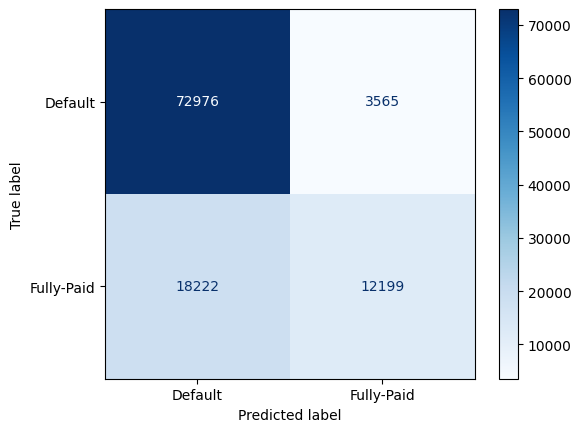

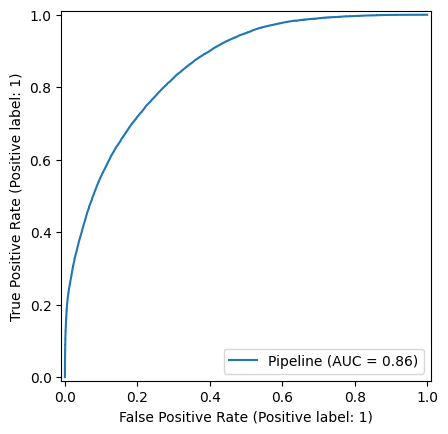

In [26]:
disp = ConfusionMatrixDisplay.from_estimator(
    random_forest_pipe, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(random_forest_pipe, X_test, y_test)

In [ ]:
train_roc_auc_scores_rf = []
test_roc_auc_scores_rf = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f"Fold {fold}:\n{'='*50}")
  
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    

    random_forest_pipe.fit(X_train_fold, y_train_fold)
    
    y_train_pred_fold = random_forest_pipe.predict(X_train_fold)
    y_train_proba_fold = random_forest_pipe.predict_proba(X_train_fold)[:, 1]
    y_test_pred_fold = random_forest_pipe.predict(X_test_fold)
    y_test_proba_fold = random_forest_pipe.predict_proba(X_test_fold)[:, 1]
    train_roc_auc = roc_auc_score(y_train_fold, y_train_proba_fold)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_proba_fold)
    train_roc_auc_scores_rf.append(train_roc_auc)
    test_roc_auc_scores_rf.append(test_roc_auc)
  
    print_score(y_train_fold, y_train_pred_fold, proba=y_train_proba_fold, train=True)
    print_score(y_test_fold, y_test_pred_fold, proba=y_test_proba_fold, train=False)
    
    fold += 1

Fold 1:
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   0.4s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   3.7s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.4s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  10.2s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.2s
[Pipeline] ............. (step 7 of 7) Processing Model, total=  12.1s
Train Result:
Accuracy Score: 80.16%
ROC AUC Score: 0.8632
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.802155      0.798453  0.801616       0.800304       0.801099
recall          0.958931      0.407555  0.801616       0.683243       0.801616
f1-score        0.873565      0.539654  0.801616       0.706609       0.778296
support    160533.000000  64087.000000  0.801616 

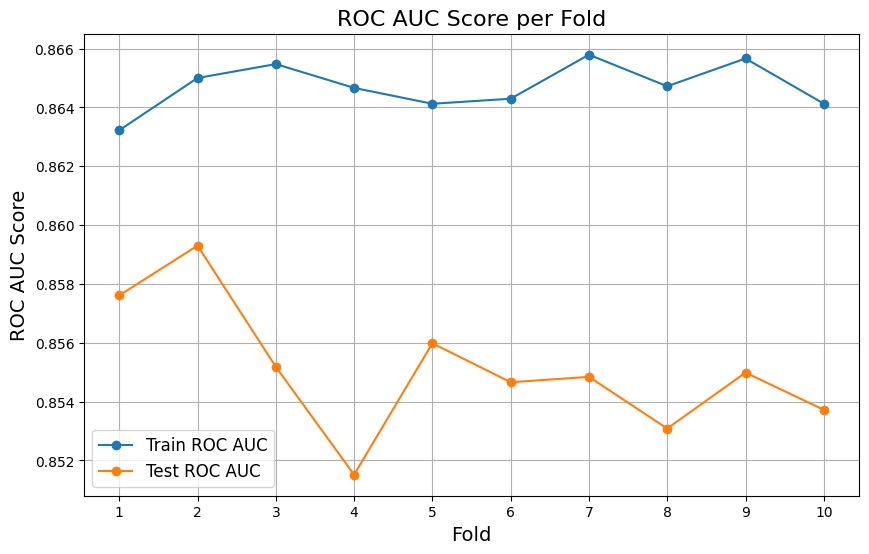

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_roc_auc_scores_rf) + 1), train_roc_auc_scores_rf, label='Train ROC AUC', marker='o')
plt.plot(range(1, len(test_roc_auc_scores_rf) + 1), test_roc_auc_scores_rf, label='Test ROC AUC', marker='o')
plt.title('ROC AUC Score per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.xticks(range(1, len(train_roc_auc_scores_rf) + 1))
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
param_distributions_rf = {
    'Model__n_estimators': [50, 100, 200], # Number of trees in the forest
    'Model__max_depth': [5, 7, 10, 15, None], # Maximum depth of each tree (None means unlimited)
    'Model__min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node
    'Model__min_samples_leaf': [1, 2, 5, 10], # Minimum number of samples required to be at a leaf node
    'Model__max_features': ['sqrt', 'log2', None], # Number of features to consider when looking for the best split
    'Model__bootstrap': [True, False], # Whether bootstrap samples are used when building trees
}

random_search_rf = RandomizedSearchCV(
    estimator=random_forest_pipe,         
    param_distributions=param_distributions_rf,  
    n_iter=20,                            
    scoring='roc_auc',                    
    cv=5,                                 
    verbose=2,                            
    random_state=42,                      
    n_jobs=-1                             
)

random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Pipeline] .... (step 1 of 7) Processing RD_engineering, total=   1.2s
[Pipeline] ...... (step 2 of 7) Processing OHE_encoding, total=   4.7s
[Pipeline] .. (step 3 of 7) Processing Nominal_encoding, total=   0.5s
[Pipeline] ...... (step 4 of 7) Processing Drop columns, total=   0.0s
[Pipeline] ... (step 5 of 7) Processing Power_transform, total=  18.1s
[Pipeline] ....... (step 6 of 7) Processing Standardize, total=   0.3s
[Pipeline] ............. (step 7 of 7) Processing Model, total= 3.7min


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('RD_engineering',
                                              DatetimeSubtraction(new_variables_names=['duration_payment'],
                                                                  reference='LoanDate',
                                                                  variables='MaturityDate_Original')),
                                             ('OHE_encoding',
                                              OneHotEncoder(drop_last=True,
                                                            drop_last_binary=True,
                                                            variables=['VerificationType',
                                                                       'Gender',
                                                                       'Education',
                                                                       'HomeOwnershipType',
                                                                       'NewCreditCustomer',
                                                                       'Emplo...
                                                                     n_jobs=-1,
                                                                     random_state=42))],
                                      verbose=True),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'Model__bootstrap': [True, False],
                                        'Model__max_depth': [5, 7, 10, 15,
                                                             None],
                                        'Model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'Model__min_samples_leaf': [1, 2, 5,
                                                                    10],
                                        'Model__min_samples_split': [2, 5, 10,
                                                                     20],
                                        'Model__n_estimators': [50, 100, 200]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [30]:
best_params = random_search_rf.best_params_
print("Best parameters found:", best_params)
print("Best parameters found:", random_search_rf.best_params_)
print("Best ROC AUC score:", random_search_rf.best_score_)
print("Best estimator:", random_search_rf.best_estimator_)

Best parameters found: {'Model__n_estimators': 200, 'Model__min_samples_split': 20, 'Model__min_samples_leaf': 2, 'Model__max_features': None, 'Model__max_depth': None, 'Model__bootstrap': True}
Best parameters found: {'Model__n_estimators': 200, 'Model__min_samples_split': 20, 'Model__min_samples_leaf': 2, 'Model__max_features': None, 'Model__max_depth': None, 'Model__bootstrap': True}
Best ROC AUC score: 0.8854709402701451
Best estimator: Pipeline(steps=[('RD_engineering',
                 DatetimeSubtraction(new_variables_names=['duration_payment'],
                                     reference='LoanDate',
                                     variables='MaturityDate_Original')),
                ('OHE_encoding',
                 OneHotEncoder(drop_last=True, drop_last_binary=True,
                               variables=['VerificationType', 'Gender',
                                          'Education', 'HomeOwnershipType',
                                          'NewCreditCusto

In [31]:
best_model = random_search_rf.best_estimator_
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
print_score(y_train, y_train_pred, proba=y_train_proba, train=True)
print_score(y_test, y_test_pred, proba=y_test_proba, train=False)

Train Result:
Accuracy Score: 93.95%
ROC AUC Score: 0.9835
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.937379      0.945797  0.939502       0.941588       0.939781
recall          0.980877      0.835859  0.939502       0.908368       0.939502
f1-score        0.958635      0.887436  0.939502       0.923036       0.938321
support    178371.000000  71207.000000  0.939502  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[174960   3411]
 [ 11688  59519]]

Test Result:
Accuracy Score: 82.39%
ROC AUC Score: 0.8872
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy      macro avg   weighted avg
precision      0.851312      0.73318  0.823881       0.792246       0.817714
recall         0.913419      0.59860  0.823881       0.756009       0.823881
f1-score   

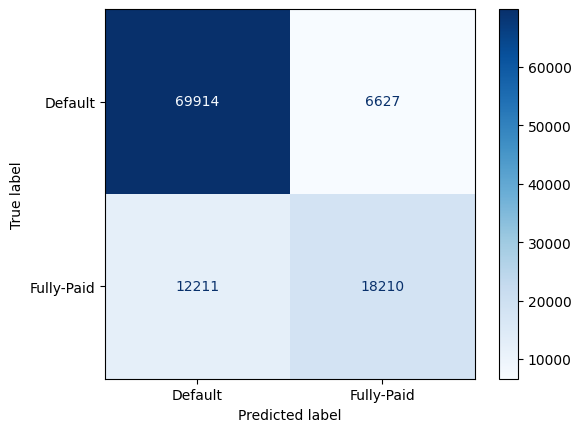

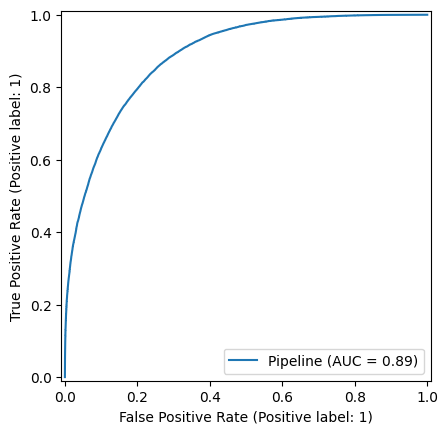

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(best_model, X_test, y_test)

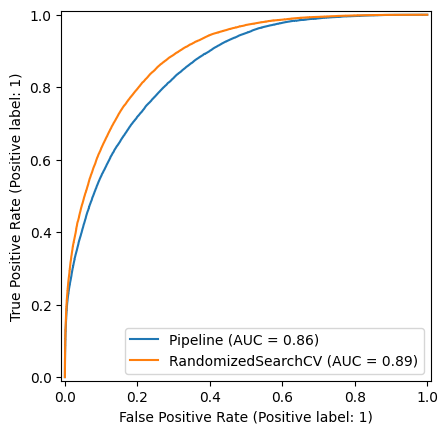

In [34]:
disp = RocCurveDisplay.from_estimator(random_forest_pipe, X_test, y_test)
RocCurveDisplay.from_estimator(random_search_rf, X_test, y_test, ax=disp.ax_)

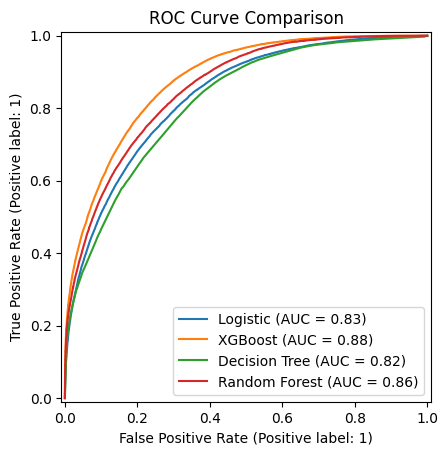

In [ ]:
# Generate ROC curves with custom labels for each model
disp = RocCurveDisplay.from_estimator(
    logistic_pipe, X_test, y_test, name="Logistic", ax=None
)
RocCurveDisplay.from_estimator(
    xgboost_pipe, X_test, y_test, name="XGBoost", ax=disp.ax_
)
RocCurveDisplay.from_estimator(
    decision_tree_pipe, X_test, y_test, name="Decision Tree", ax=disp.ax_
)
RocCurveDisplay.from_estimator(
    random_forest_pipe, X_test, y_test, name="Random Forest", ax=disp.ax_
)
disp.ax_.set_title("ROC Curve Comparison")
disp.ax_.legend(loc="lower right")

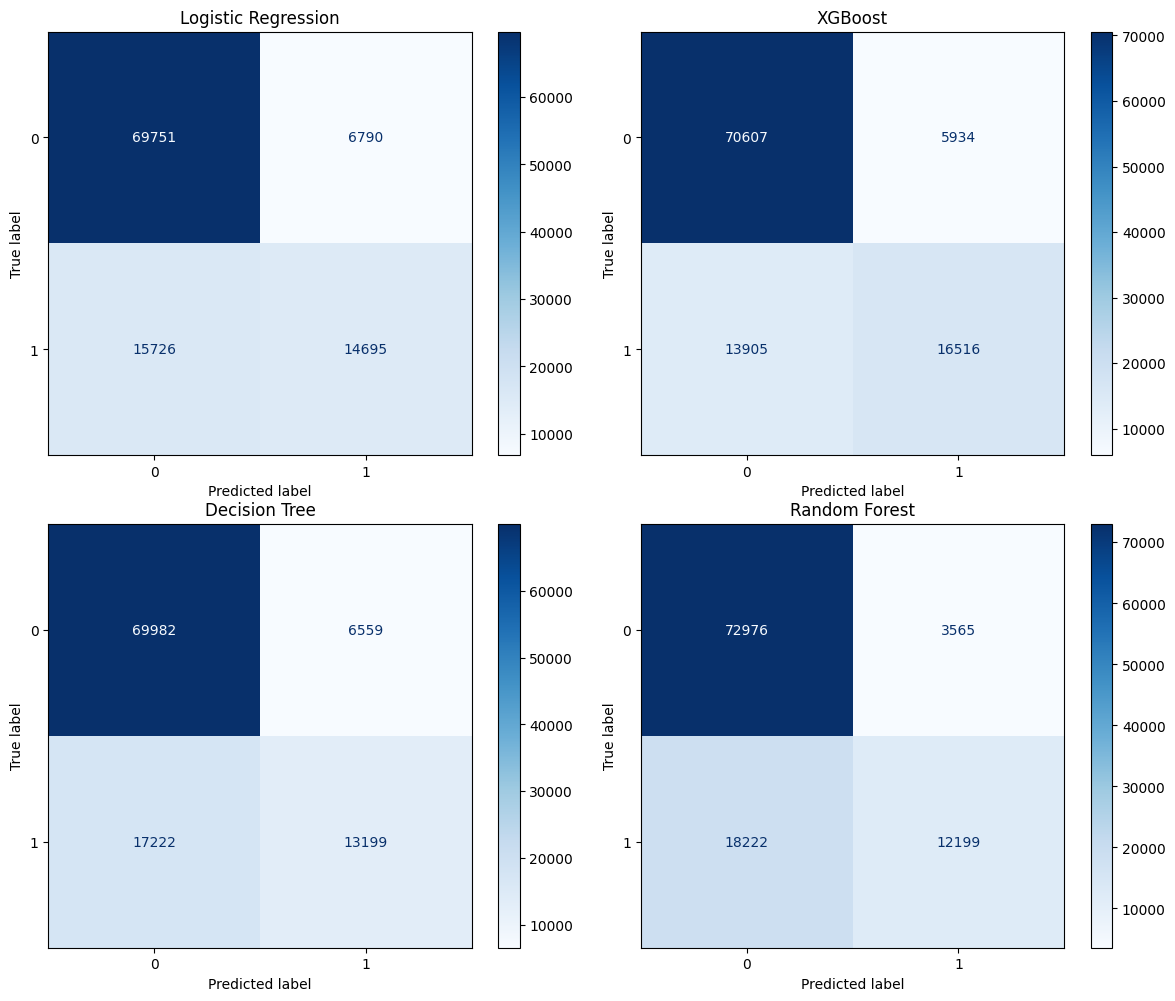

In [ ]:
# List of models and their names
models = [
    ("Logistic Regression", logistic_pipe),
    ("XGBoost", xgboost_pipe),
    ("Decision Tree", decision_tree_pipe),
    ("Random Forest", random_forest_pipe),
]

# Set up the layout for the plot (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Iterate over models and plot the confusion matrix for each
for ax, (name, model) in zip(axes, models):
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, cmap="Blues", ax=ax, values_format="d"
    )
    ax.set_title(name)

# Improve the layout
plt.tight_layout()
plt.show()

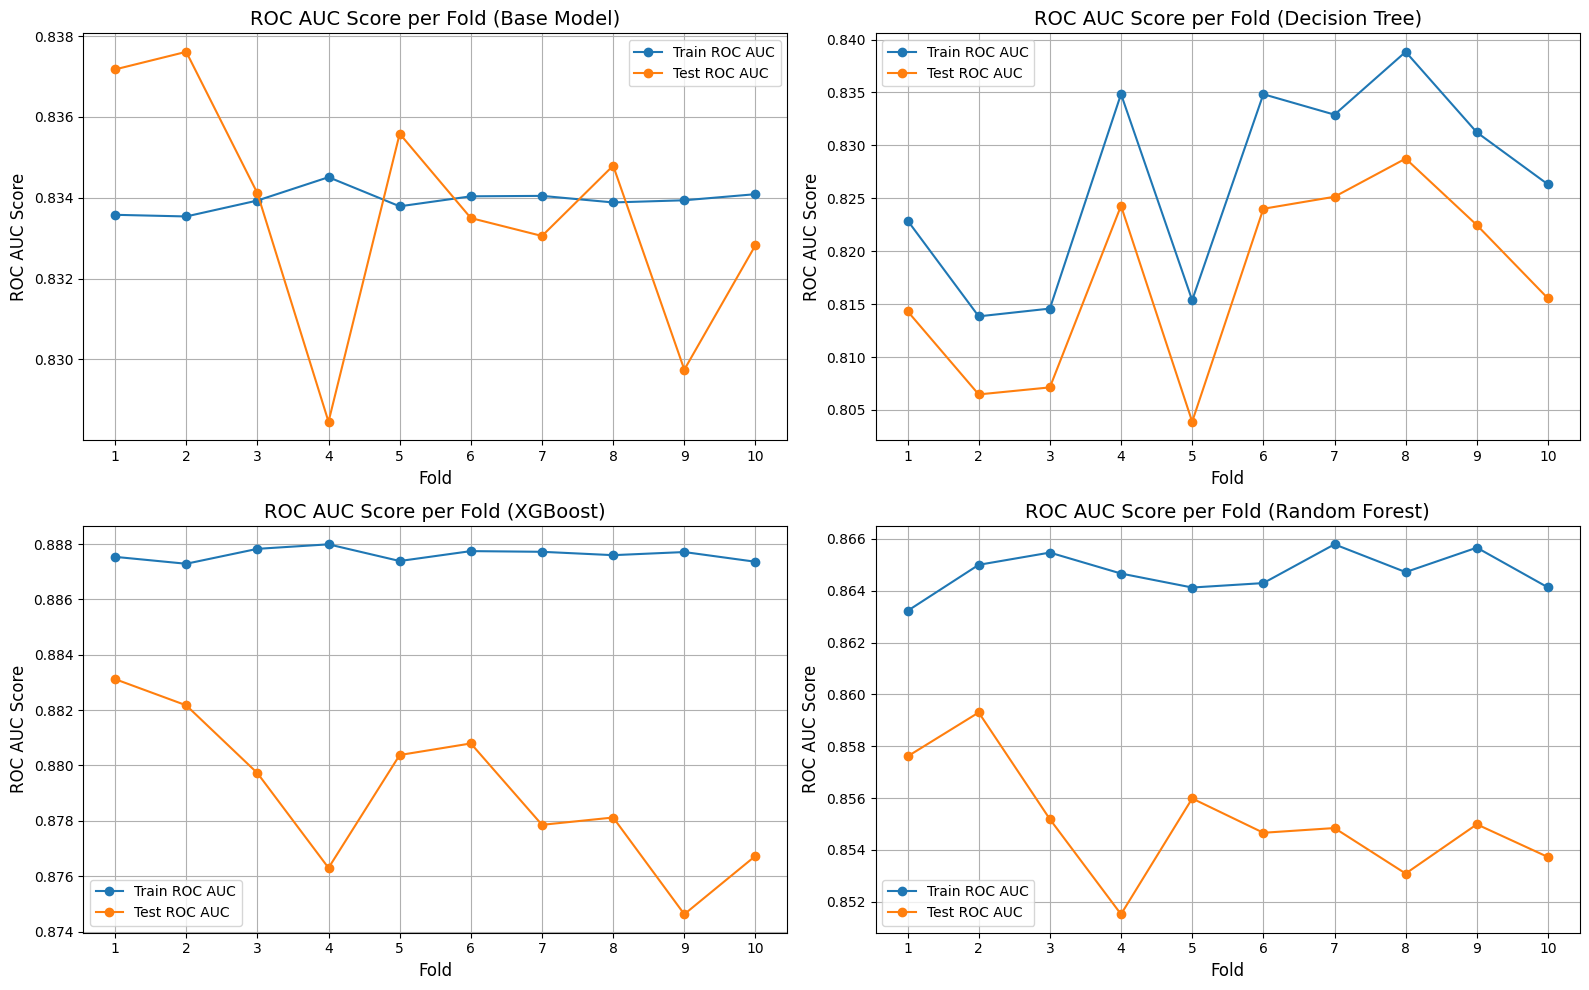

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# First plot: base model ROC AUC per fold
axes[0, 0].plot(range(1, len(train_roc_auc_scores) + 1), train_roc_auc_scores, label='Train ROC AUC', marker='o')
axes[0, 0].plot(range(1, len(test_roc_auc_scores) + 1), test_roc_auc_scores, label='Test ROC AUC', marker='o')
axes[0, 0].set_title('ROC AUC Score per Fold (Base Model)', fontsize=14)
axes[0, 0].set_xlabel('Fold', fontsize=12)
axes[0, 0].set_ylabel('ROC AUC Score', fontsize=12)
axes[0, 0].set_xticks(range(1, len(train_roc_auc_scores) + 1))
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True)

# Second plot: Decision Tree ROC AUC per fold
axes[0, 1].plot(range(1, len(train_roc_auc_scores_dt) + 1), train_roc_auc_scores_dt, label='Train ROC AUC', marker='o')
axes[0, 1].plot(range(1, len(test_roc_auc_scores_dt) + 1), test_roc_auc_scores_dt, label='Test ROC AUC', marker='o')
axes[0, 1].set_title('ROC AUC Score per Fold (Decision Tree)', fontsize=14)
axes[0, 1].set_xlabel('Fold', fontsize=12)
axes[0, 1].set_ylabel('ROC AUC Score', fontsize=12)
axes[0, 1].set_xticks(range(1, len(train_roc_auc_scores_dt) + 1))
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True)

# Third plot: XGBoost ROC AUC per fold
axes[1, 0].plot(range(1, len(train_roc_auc_scores_xgb) + 1), train_roc_auc_scores_xgb, label='Train ROC AUC', marker='o')
axes[1, 0].plot(range(1, len(test_roc_auc_scores_xgb) + 1), test_roc_auc_scores_xgb, label='Test ROC AUC', marker='o')
axes[1, 0].set_title('ROC AUC Score per Fold (XGBoost)', fontsize=14)
axes[1, 0].set_xlabel('Fold', fontsize=12)
axes[1, 0].set_ylabel('ROC AUC Score', fontsize=12)
axes[1, 0].set_xticks(range(1, len(train_roc_auc_scores_xgb) + 1))
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True)

# Fourth plot: Random Forest ROC AUC per fold
axes[1, 1].plot(range(1, len(train_roc_auc_scores_rf) + 1), train_roc_auc_scores_rf, label='Train ROC AUC', marker='o')
axes[1, 1].plot(range(1, len(test_roc_auc_scores_rf) + 1), test_roc_auc_scores_rf, label='Test ROC AUC', marker='o')
axes[1, 1].set_title('ROC AUC Score per Fold (Random Forest)', fontsize=14)
axes[1, 1].set_xlabel('Fold', fontsize=12)
axes[1, 1].set_ylabel('ROC AUC Score', fontsize=12)
axes[1, 1].set_xticks(range(1, len(train_roc_auc_scores_rf) + 1))
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Artificial Neural Network (ANNs)**

In [ ]:
filtered_data_copy = filtered_data.copy()

In [ ]:
print([column for column in filtered_data_copy.columns if filtered_data_copy[column].dtype == object])

['VerificationType', 'Gender', 'Education', 'HomeOwnershipType', 'EmploymentDurationCurrentEmployer', 'Rating', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'Country', 'AgeGroup', 'LoanDuration_Category']


In [ ]:
dummies=['VerificationType', 'Gender', 'Education', 'HomeOwnershipType', 'EmploymentDurationCurrentEmployer', 'Rating', 'ApplicationSignedWeekday', 'Country']
filtered_data_copy= pd.get_dummies(
    filtered_data_copy, 
    columns=dummies, 
    drop_first=True
)

In [ ]:
nominal_variables=["AgeGroup","LoanDuration_Category", "ApplicationSignedHour"]
category_orders={
    'AgeGroup': ['Young','Adult','Elderly'],
    'LoanDuration_Category': ['Short Term', 'Medium Term', 'Long Term', 'Very Long Term'],
    'ApplicationSignedHour': ['Morning', 'Afternoon', 'Evening']
}
for col, order in category_orders.items():
    filtered_data_copy[col] = pd.Categorical(filtered_data_copy[col], categories=order, ordered=True).codes + 1

In [ ]:
filtered_data_copy['duration_payment'] = (filtered_data_copy['MaturityDate_Original'] - filtered_data_copy['LoanDate']).dt.days

In [ ]:
filtered_data_copy.drop(
    [
    "FirstPaymentDate",
    "MaturityDate_Original",
    "LoanDate",
], 
    axis=1,
    inplace=True
)

In [ ]:
train_ANNs, test_ANNs = train_test_split(filtered_data_copy, test_size=0.3, random_state=42)

print(train_ANNs.shape)
print(test_ANNs.shape)

(249578, 51)
(106962, 51)


In [34]:
X_train_ANNs = train_ANNs.drop(["target"], axis=1)
X_test_ANNs = test_ANNs.drop(["target"], axis=1)

y_train_ANNs = train_ANNs["target"]
y_test_ANNs = test_ANNs["target"]


In [35]:
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_ANNs = power_transformer.fit_transform(X_train_ANNs)
X_test_ANNs = power_transformer.transform(X_test_ANNs)

scaler = StandardScaler()
X_train_ANNs = scaler.fit_transform(X_train_ANNs)
X_test_ANNs = scaler.transform(X_test_ANNs)

In [37]:
X_train_ANNs = np.array(X_train_ANNs).astype(np.float32)
X_test_ANNs = np.array(X_test_ANNs).astype(np.float32)
y_train_ANNs = np.array(y_train_ANNs).astype(np.float32)
y_test_ANNs = np.array(y_test_ANNs).astype(np.float32)

In [ ]:
# Function to evaluate a neural network model: prints accuracy, classification report, and confusion matrix for train or test set
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
    else:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

# Function to plot the learning evolution: shows loss and AUC curves for training and validation during training
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during training')
    plt.legend()

In [ ]:
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp) # Batch normalization on input
    x = Dropout(dropout_rates[0])(x) # Initial dropout for regularization
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x) # Hidden dense layer with ReLU activation
        x = BatchNormalization()(x) # Batch normalization after each dense layer
        x = Dropout(dropout_rates[i + 1])(x) # Dropout after each dense layer
    x = Dense(num_labels, activation='sigmoid')(x) # Output layer with sigmoid activation for binary/multilabel classification
  
    model = Model(inputs=inp, outputs=x) # Build the Keras model
    model.compile(optimizer=Adam(learning_rate), # Adam optimizer with specified learning rate
                  loss='binary_crossentropy', # Binary cross-entropy loss function
                  metrics=[AUC(name='AUC')])  # Track AUC metric during training
    return model

In [ ]:
num_columns = X_train_ANNs.shape[1] # Number of input features for the neural network
num_labels = 1 # Number of output labels (1 for binary classification)
hidden_units = [150, 150, 150] # List specifying the number of units in each hidden layer
dropout_rates = [0.1, 0, 0.1, 0] # Dropout rates for input and each hidden layer
learning_rate = 1e-3 # Learning rate for the optimizer


model = nn_model(
    num_columns=num_columns, # Pass number of input features
    num_labels=num_labels, # Pass number of output labels
    hidden_units=hidden_units, # Pass hidden layer configuration
    dropout_rates=dropout_rates, # Pass dropout rates
    learning_rate=learning_rate # Pass learning rate
)
model_ANNs = model.fit(
    X_train_ANNs, y_train_ANNs,
    validation_data=(X_test_ANNs, y_test_ANNs),
    epochs=20, # Number of training epochs
    batch_size=32 # Number of samples per gradient update
)

Epoch 1/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - AUC: 0.7960 - loss: 0.4784 - val_AUC: 0.8215 - val_loss: 0.4511
Epoch 2/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - AUC: 0.8251 - loss: 0.4433 - val_AUC: 0.8541 - val_loss: 0.4126
Epoch 3/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - AUC: 0.8318 - loss: 0.4363 - val_AUC: 0.8580 - val_loss: 0.4094
Epoch 4/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - AUC: 0.8356 - loss: 0.4327 - val_AUC: 0.8545 - val_loss: 0.4136
Epoch 5/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - AUC: 0.8379 - loss: 0.4301 - val_AUC: 0.8624 - val_loss: 0.4062
Epoch 6/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - AUC: 0.8391 - loss: 0.4282 - val_AUC: 0.8567 - val_loss: 0.4126
Epoch 7/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - AUC: 0.8409 - loss: 0.4271 - val_AUC: 0.8383 - val_loss: 0.4285
Epoch 8/20
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - AUC: 0.8428 - loss: 0.4253 - val_AUC: 0.8592 - val_loss: 0.4063
Epoch 9/20
7800/7800 ━━━━━━━━━━━

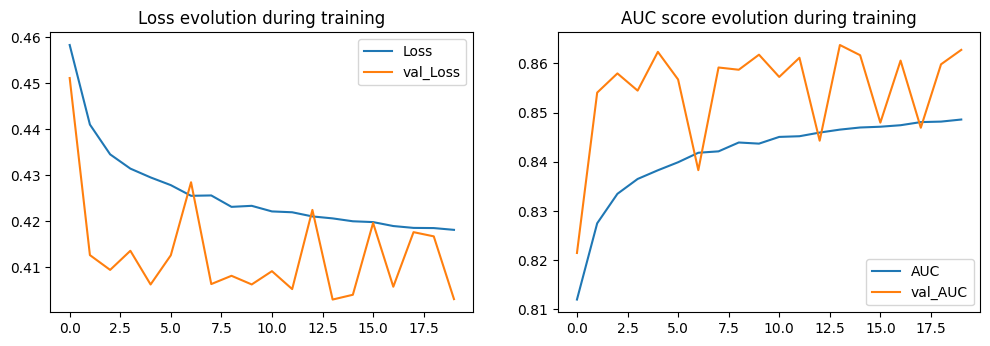

In [42]:
plot_learning_evolution(model_ANNs)

In [43]:
y_train_pred_ANNs = model.predict(X_train_ANNs)
evaluate_nn(y_train_ANNs, y_train_pred_ANNs.round(), train=True)

7800/7800 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
Train Result:
Accuracy Score: 80.36%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.811048      0.766616  0.803637       0.788832       0.798371
recall          0.945529      0.448200  0.803637       0.696865       0.803637
f1-score        0.873141      0.565678  0.803637       0.719410       0.785419
support    178371.000000  71207.000000  0.803637  249578.000000  249578.000000
_______________________________________________
Confusion Matrix: 
 [[168655   9716]
 [ 39292  31915]]



In [44]:
y_test_pred_ANNs = model.predict(X_test_ANNs)
evaluate_nn(y_test_ANNs, y_test_pred_ANNs.round(), train=False)

3343/3343 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Test Result:
Accuracy Score: 80.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.809886      0.759111  0.801472       0.784499       0.795445
recall         0.944213      0.442326  0.801472       0.693269       0.801472
f1-score       0.871906      0.558955  0.801472       0.715431       0.782900
support    76541.000000  30421.000000  0.801472  106962.000000  106962.000000
_______________________________________________
Confusion Matrix: 
 [[72271  4270]
 [16965 13456]]



3343/3343 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


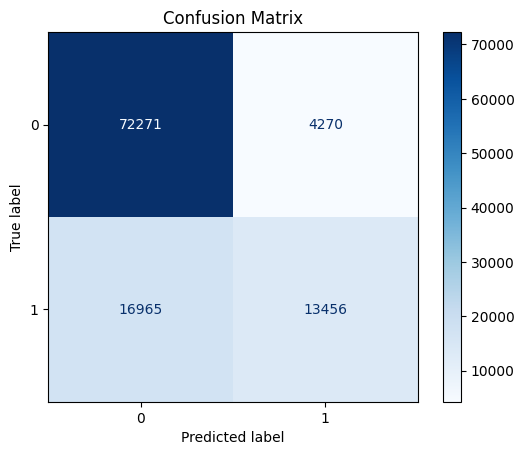

In [ ]:
y_pred_proba = model.predict(X_test_ANNs)
# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_ANNs, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

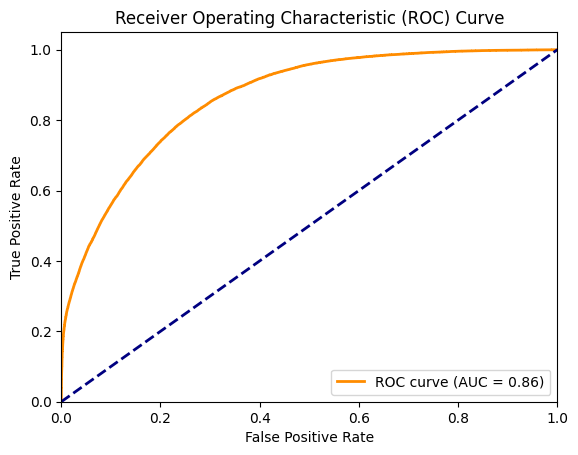

In [49]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_ANNs, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()